In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import scipy as scp
import scipy.stats as stats
from matplotlib_venn import venn2_unweighted
from pysankey import sankey
from matplotlib import rcParams
from scipy.stats.contingency import odds_ratio
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Helper Functions

In [2]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))
def letter_annotation(ax, xoffset, yoffset, letter,fontsize):
 ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
         size=fontsize, weight='bold')

# Load Data

In [3]:
df= pd.read_csv('../data/240_B.txt',sep="\t") 
df.head()

,PMC_ID,PMC_Year,Journal,IF,Article Title,Type of paper,Secondary analysis,Data availability statement (yes/no),Data availability with explaination(yes/no),Data availability (yes/no),...,"If yes, notebook/Rmd","If yes, single/ multiple",Summary data (yes/ no/ partial),Number of citations,Gender of the PI,"Experience of PI/ Last author (Check their profile or webpage to see whether they are an associate/ assistant/ professor/ professor emiretus, etc)",PI/ last author's training background - CS/ Bioinformatics/ Other,PI (last author's) education level - PhD/PostDoc/ Master's etc,First author's education level,First author's training background (CS/ Bioinformatics/ Other)
0,PMC6686906,2019,Nat_Genet,28.0,Accurate estimation of SNP-heritability from b...,Research article,hybrid,yes,yes for secondary/ no for primary,no,...,NaN,NaN,yes,47,Male,Associate Professor,"CS, Bioinformatics",Postdoc,MS,Bioinformatics
1,PMC7610512,2020,Nat_Genet,38.3,Regulation of single-cell genome organization ...,Research article,Hybrid,yes,yes for secondary/Available upon request for p...,no,...,NaN,NaN,yes,39,Male,Research Director,Other,Postdoc,Postdoc,"Other, Genetics"
2,PMC7343611,2020,Nat_Genet,38.3,Lymph node metastases develop through a wider ...,Research article,Hybrid,yes,yes,yes,...,notebook,multiple,yes,31,Female,Assistant Professor,Other,Phd,Postdoc,CS
3,PMC6767648,2019,Genome_Med,11.0,Identifying Crohn’s disease signal from variom...,Research article,hybrid,yes,yes for secondary/ Available upon request for ...,no,...,NaN,NaN,yes,58,Female,Associate Professor,Bioinformatics,Phd,Phd,Bioinformatics
4,PMC6862797,2019,Genome_Biol,9.5,Population-level analysis reveals the widespre...,Research article,no,yes,yes,yes,...,NaN,NaN,no,74,Male,Professor,Other,Phd,Masters,Other


# Data cleanup

In [4]:
#github cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'github', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'GitHub + Zenodo', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub, Zenodo'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Zenodo/GitHub', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub, Zenodo'

#Bitbucket cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'BitBucket', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Bitbucket)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (BitBucket)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'

#Sourceforge cleanup 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Sourceforge)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Sourceforge'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Sourceforge)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Sourceforge'

# Website Cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Others (Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Website), GitHub', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website, Github'

# Supplementary Cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Supplementary)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Supplementary'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Others(Supplementary)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Supplementary'

# No,Nan merge 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'no', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'NA'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'nan', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'NA'

#gitlab fix 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'gitlab', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitLab'

#downloadable file fix 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'downloadable file', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Downloadable File'


#GEO Fix 
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'Geo', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'GEO'

#Other Fix for 'If Data availability = yes, where do they share data? (SRA/GEO/other)'
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'other', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'Other'
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'SRA,other', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'SRA,Other'

#cleanup secondary analysis column 
df.loc[df['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'


# Figure 1 

## Figure 1a

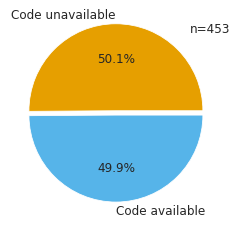

In [33]:
rcParams['font.family'] = 'sans-serif'
#colors=sns.color_palette('pastel')
colors = ['#E69F00', '#56B4E9']
explode = (0.05, 0) 
textprops = {"fontsize":12}
plt.pie(df['Code availability (Yes/No)'].value_counts(), explode=explode, labels=['Code unavailable','Code available'], colors=colors, autopct='%1.1f%%',textprops = textprops)
plt.text(0.85, 0.95, "n=453", fontsize=12)
sns.despine()
plt.show()


## Figure 1b

In [5]:
df_code_avail=pd.DataFrame({'Counts': df['Code availability (Yes/No)'].value_counts()}).reset_index()
#rename columns
df_code_avail=df_code_avail.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail['Percentage'] = (df_code_avail['Counts']/df_code_avail['Counts'].sum()) * 100
df_code_avail['Percentage']=df_code_avail['Percentage'].round(2)
df_code_avail

,Code availability (Yes/No),Counts,Percentage
0,no,227,50.11
1,yes,226,49.89


In [6]:
df_code_avail_statement=pd.DataFrame({'Counts': df['Code availability statement (Yes/No)'].value_counts()}).reset_index()
df_code_avail_statement=df_code_avail_statement.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail_statement['Percentage'] = (df_code_avail_statement['Counts']/df_code_avail_statement['Counts'].sum()) * 100
df_code_avail_statement['Percentage']=df_code_avail_statement['Percentage'].round(2)
df_code_avail_statement

,Code availability (Yes/No),Counts,Percentage
0,no,244,53.86
1,yes,209,46.14


In [7]:
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability statement (Yes/No)','Code availability (Yes/No)',]).size()}).reset_index()
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'yes', 'Code availability statement (Yes/No)'] = 'Code availability\nstatement given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'no', 'Code availability statement (Yes/No)'] = 'Code availability\nstatement not given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'no', 'Code availability (Yes/No)'] = 'Code unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'yes', 'Code availability (Yes/No)'] = 'Code available\n(' + str(df_code_avail['Percentage'][1]) + '%)'


df_temp

,Code availability statement (Yes/No),Code availability (Yes/No),Counts
0,Code availability\nstatement not given\n(53.86%),Code unavailable\n(50.11%),197
1,Code availability\nstatement not given\n(53.86%),Code available\n(49.89%),47
2,Code availability\nstatement given\n(46.14%),Code unavailable\n(50.11%),30
3,Code availability\nstatement given\n(46.14%),Code available\n(49.89%),179


<AxesSubplot:>

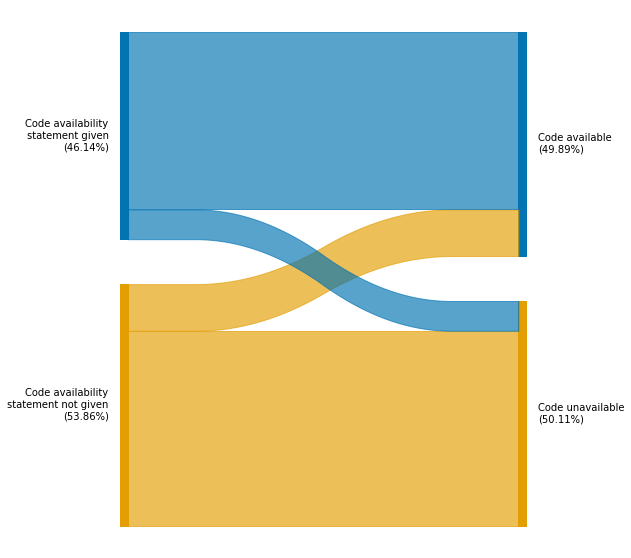

In [29]:
plt.figure(figsize=(8, 10))
rcParams['font.family'] = 'sans-serif'
category_labels = [
    'Code availability\nstatement not given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)',
    'Code availability\nstatement given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)', 
    'Code unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)',
    'Code available\n(' + str(df_code_avail['Percentage'][1]) + '%)'
]
#colors = ["#fe2626","#21a0fc","#eef91a","#40ee40"]
colors = ["#e29d00","#0072B2","#e29d00","#0072B2"]
#colors = sns.color_palette("pastel")
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]

sankey(
    left=df_temp['Code availability statement (Yes/No)'].values, right=df_temp['Code availability (Yes/No)'].values,  rightWeight=df_temp['Counts'].values.astype(float), leftWeight=df_temp['Counts'].values.astype(float), aspect=20,
    fontsize=10,colorDict=color_dict
)


## Figure 1c

In [40]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Code availability (Yes/No)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
#df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'yes'
df_temp = df_temp.drop('Secondary analysis', axis=1)


#dealing with both value for Analysis column
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Primary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Secondary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Analysis']=='Both'].index[0])


#df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
#df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp=df_temp.pivot(index='Analysis',columns='Code availability (Yes/No)',values='Counts')
df_temp=df_temp.rename(columns={"no":"Code unavailable","yes":"Code available"})
df_temp

Code availability (Yes/No),Code unavailable,Code available
Analysis,,
Primary Analysis,130,74
Secondary Analysis,97,156


In [41]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df_temp)

# Display the test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 28.106391604188723
P-value: 1.1482601063804904e-07


<Figure size 720x720 with 0 Axes>

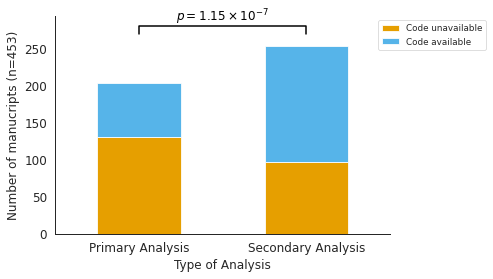

In [43]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#0072B2','#D55E00']
df_temp.plot(kind='bar', stacked=True, color=['#E69F00', '#56B4E9'])
# statistical annotation
y, h, col = 270, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,2)), ha='center', va='bottom', color=col, fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Type of Analysis",fontsize=12)
plt.ylabel("Number of manucripts (n=453)",fontsize=12)
#plt.ylim(0,100)
plt.xticks(rotation=0)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
#plt.savefig('../Figures/sup2_v2.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 1d

In [419]:
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Code availability (Yes/No)','Data availability (yes/no)']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
df_temp = df_temp.drop('Secondary analysis', axis=1)
df_temp=pd.DataFrame({'Analysis': ['Data','Data','Code','Code'], 'Availability': ['No','Yes','No','Yes'], 
              'Counts':[df_temp.loc[df_temp['Data availability (yes/no)']=='no','Counts'].sum(),
                        df_temp.loc[df_temp['Data availability (yes/no)']=='yes','Counts'].sum(),
                        df_temp.loc[df_temp['Code availability (Yes/No)']=='no','Counts'].sum(),
                        df_temp.loc[df_temp['Code availability (Yes/No)']=='yes','Counts'].sum()]})

df_temp=df_temp.pivot(index='Analysis',columns='Availability',values='Counts')
df_temp=df_temp.rename(columns={"No":"Unavailable", "Yes":"Available"})
df_temp

Availability,Unavailable,Available
Analysis,,
Code,130,74
Data,62,142


In [413]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df_temp)

# Display the test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 44.16261574074074
P-value: 3.021978769442915e-11


In [420]:
df_temp['Unavailable']

Analysis
Code    130
Data     62
Name: Unavailable, dtype: int64

<Figure size 1000x1000 with 0 Axes>

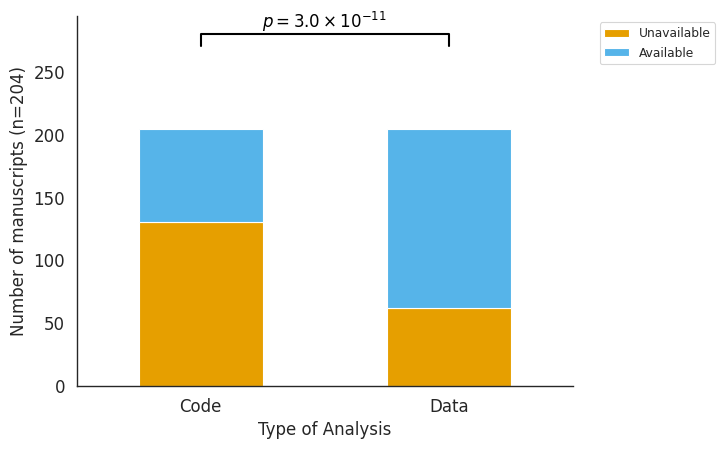

In [421]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#E69F00', '#56B4E9']
df_temp.plot(kind='bar', stacked=True, color=colors)
# statistical annotation
y, h, col = 270, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize=12)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Type of Analysis",fontsize=12)
plt.ylabel("Number of manuscripts (n=204)",fontsize=12)
#plt.ylim(0,100)
plt.xticks(rotation=0)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
#plt.savefig('../Figures/sup2_v2.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 1e

In [58]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)']).size()}).reset_index()
df_temp['Labels']=['Neither available','Code available','Data available','Code and Data available']
df_temp

,Data availability (yes/no),Code availability (Yes/No),Counts,Labels
0,no,no,49,Neither available
1,no,yes,13,Code available
2,yes,no,81,Data available
3,yes,yes,61,Code and Data available


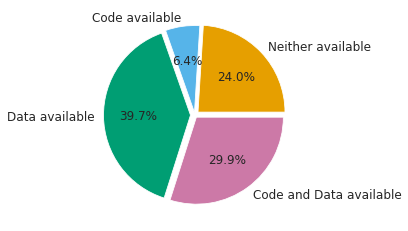

In [59]:
rcParams['font.family'] = 'sans-serif'
colors = ['#E69F00', '#56B4E9','#009E73', '#CC79A7']
explode = (0.05,0.03,0.05,0.03)
textprops = {"fontsize":12}
plt.pie(df_temp['Counts'], explode=explode, labels=df_temp['Labels'], colors=colors, autopct='%1.1f%%',textprops = textprops)
sns.despine()
plt.show()


## Figure 1f

In [51]:
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Code availability (Yes/No),PMC_Year,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,33,7.284768,7.28
1,yes,2017,28,6.181015,13.47
2,yes,2018,32,7.064018,20.53
3,yes,2019,40,8.830022,29.36
4,yes,2020,51,11.258278,40.62
5,yes,2021,42,9.271523,49.89


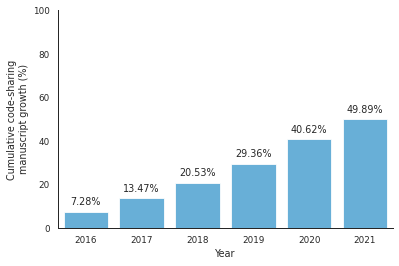

In [52]:
sns.set_style("white")
sns.set_context("paper",font_scale=1)
colors = ['#56B4E9']
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase', palette=colors)

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year")
plt.ylabel("Cumulative code-sharing\nmanuscript growth (%)")
plt.ylim([0, 100])
plt.show()

# Multipanel Figure 1

/tmp/ipykernel_607/2656926151.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[2,1],data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',palette=colors)
/tmp/ipykernel_607/2656926151.py:157: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(ax=ax[2,1],data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',palette=colors)


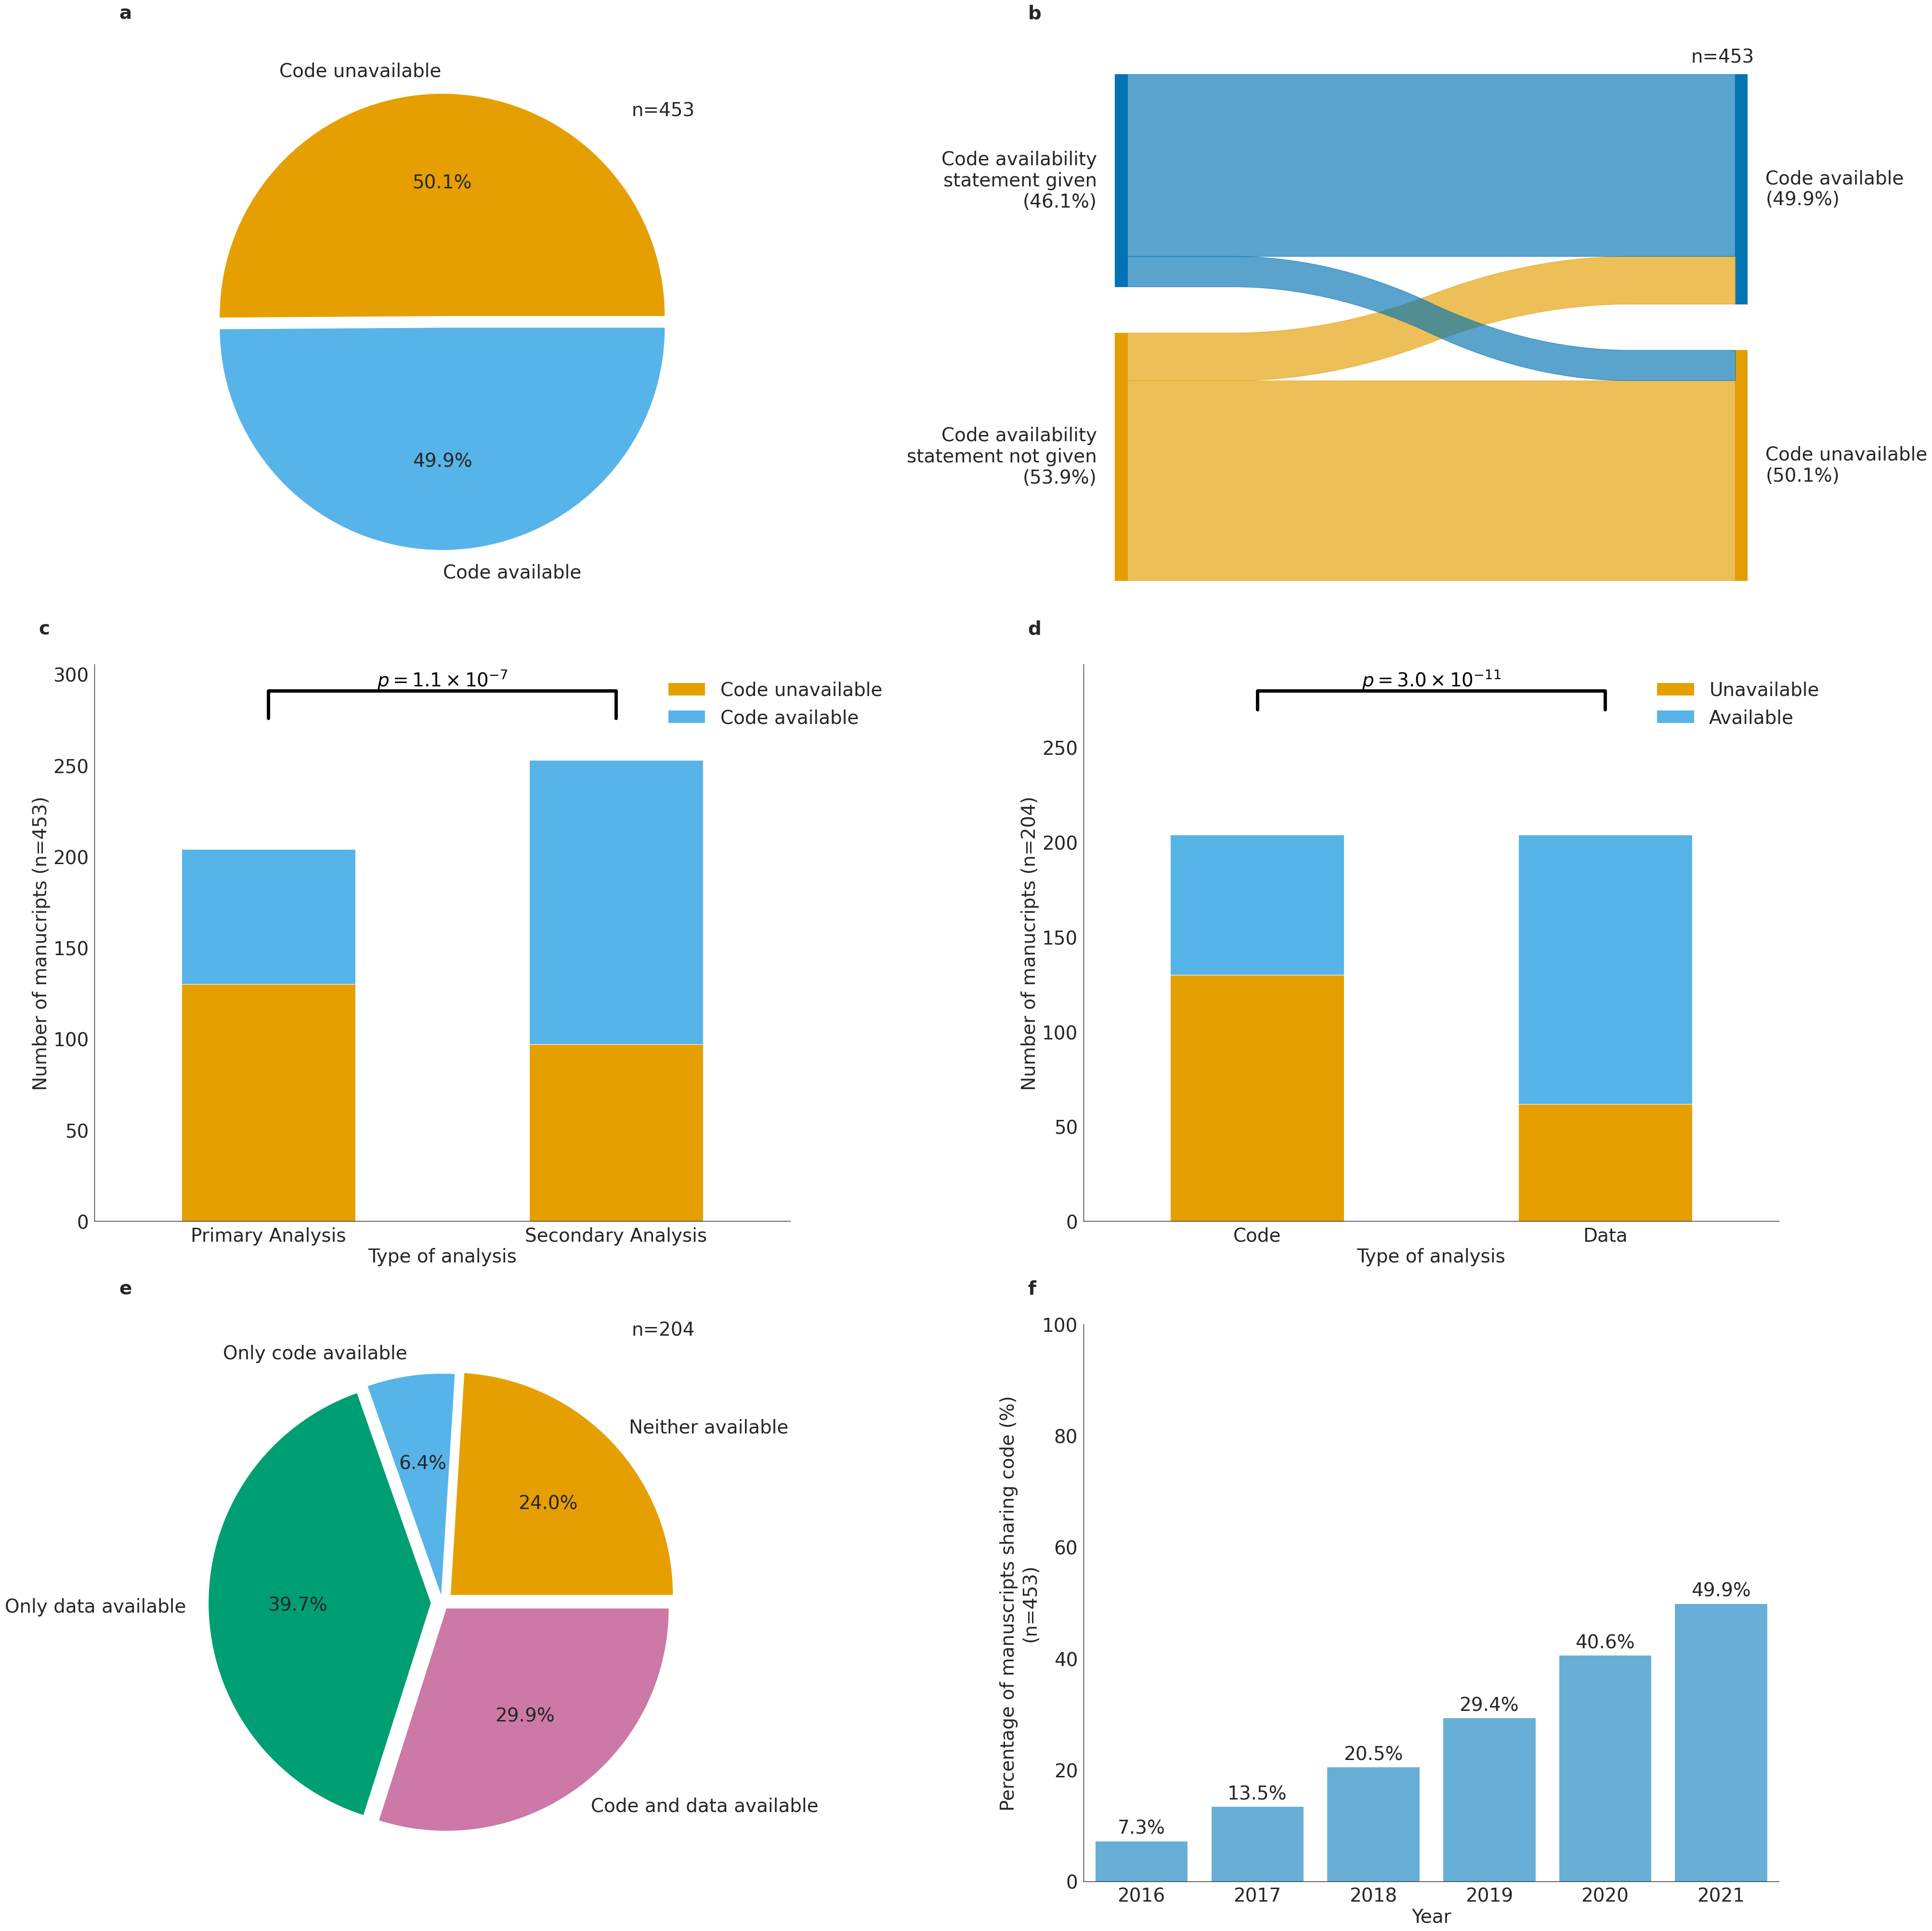

In [525]:

sns.set_style("white")
sns.set_context("paper")
#sns.color_palette("pastel")
rcParams['font.family'] = 'sans-serif'
#sns.set(font_scale=1)
fontsize=28
#plt.rcParams.update({'font.size': fontsize})
fig, ax = plt.subplots(3, 2,figsize=(40 ,40),layout='constrained')

#fig 1a 
textprops = {"fontsize":fontsize}
explode = (0.05, 0) 
colors = ['#E69F00', '#56B4E9']
ax[0,0].pie(df['Code availability (Yes/No)'].value_counts(), explode=explode, labels=['Code unavailable','Code available'], colors=colors, autopct='%1.1f%%',textprops = textprops)
ax[0,0].text(0.85, 0.95, "n=" + str(df['Code availability (Yes/No)'].value_counts().sum()), fontsize=fontsize)

# fig 1b
df_code_avail=pd.DataFrame({'Counts': df['Code availability (Yes/No)'].value_counts()}).reset_index()
#rename columns
df_code_avail=df_code_avail.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail['Percentage'] = (df_code_avail['Counts']/df_code_avail['Counts'].sum()) * 100
df_code_avail['Percentage']=df_code_avail['Percentage'].round(1)

df_code_avail_statement=pd.DataFrame({'Counts': df['Code availability statement (Yes/No)'].value_counts()}).reset_index()
df_code_avail_statement=df_code_avail_statement.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail_statement['Percentage'] = (df_code_avail_statement['Counts']/df_code_avail_statement['Counts'].sum()) * 100
df_code_avail_statement['Percentage']=df_code_avail_statement['Percentage'].round(1)

#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability statement (Yes/No)','Code availability (Yes/No)',]).size()}).reset_index()
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'yes', 'Code availability statement (Yes/No)'] = 'Code availability\nstatement given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'no', 'Code availability statement (Yes/No)'] = 'Code availability\nstatement not given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'no', 'Code availability (Yes/No)'] = 'Code unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'yes', 'Code availability (Yes/No)'] = 'Code available\n(' + str(df_code_avail['Percentage'][1]) + '%)'

category_labels = [
    'Code availability\nstatement not given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)',
    'Code availability\nstatement given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)', 
    'Code unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)',
    'Code available\n(' + str(df_code_avail['Percentage'][1]) + '%)'
]

colors = ["#e29d00","#0072B2","#e29d00","#0072B2"]
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]
sankey(
    left=df_temp['Code availability statement (Yes/No)'], right=df_temp['Code availability (Yes/No)'],  aspect=20, rightWeight=df_temp['Counts'].values.astype(float), leftWeight=df_temp['Counts'].values.astype(float),
    fontsize=fontsize,colorDict=color_dict, ax=ax[0,1]
)
ax[0,1].text(23.1, 510, "n=" + str(df_temp['Counts'].sum()), fontsize=fontsize)
ax[0,1].tick_params(axis='both', labelsize=fontsize)



#fig 1c 
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Code availability (Yes/No)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
df_temp = df_temp.drop('Secondary analysis', axis=1)
#dealing with both value for Analysis column
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Primary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Secondary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Analysis']=='Both'].index[0])
y, h, col = df_temp['Counts'].max() + 120, 15, 'k'
df_temp=df_temp.pivot(index='Analysis',columns='Code availability (Yes/No)',values='Counts')
df_temp=df_temp.rename(columns={"no":"Code unavailable","yes":"Code available"})
chi2, p, dof, expected = chi2_contingency(df_temp)
colors = ['#0072B2','#D55E00']
df_temp.plot(kind='bar', stacked=True, color=['#E69F00', '#56B4E9'], ax=ax[1,0], rot=0)
ax[1,0].legend(loc='best', bbox_to_anchor=(0.8, 1),fontsize=fontsize,frameon=False)
ax[1,0].set_xlabel("Type of analysis",fontsize=fontsize)
ax[1,0].set_ylabel("Number of manucripts (n=453)",fontsize=fontsize)
ax[1,0].tick_params(axis='both', labelsize=fontsize)

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
ax[1,0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=5, c=col)
ax[1,0].text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize=fontsize)

#fig 1d 
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Code availability (Yes/No)','Data availability (yes/no)']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
df_temp = df_temp.drop('Secondary analysis', axis=1)
df_temp=pd.DataFrame({'Analysis': ['Data','Data','Code','Code'], 'Availability': ['No','Yes','No','Yes'], 
              'Counts':[df_temp.loc[df_temp['Data availability (yes/no)']=='no','Counts'].sum(),
                        df_temp.loc[df_temp['Data availability (yes/no)']=='yes','Counts'].sum(),
                        df_temp.loc[df_temp['Code availability (Yes/No)']=='no','Counts'].sum(),
                        df_temp.loc[df_temp['Code availability (Yes/No)']=='yes','Counts'].sum()]})

df_temp=df_temp.pivot(index='Analysis',columns='Availability',values='Counts')
df_temp=df_temp.rename(columns={"No":"Unavailable", "Yes":"Available"})
chi2, p, dof, expected = chi2_contingency(df_temp)
colors = ['#0072B2','#D55E00']
df_temp.plot(kind='bar', stacked=True, color=['#E69F00', '#56B4E9'],ax=ax[1,1],rot=0)
# statistical annotation
y, h, col = 270, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
ax[1,1].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=5, c=col)
ax[1,1].text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize=fontsize)

ax[1,1].legend(loc='best', bbox_to_anchor=(0.8, 1),fontsize=fontsize,frameon=False)
ax[1,1].set_xlabel("Type of analysis",fontsize=fontsize)
ax[1,1].set_ylabel("Number of manucripts (n=204)",fontsize=fontsize)
#plt.ylim(0,100)
ax[1,1].tick_params(axis='both', labelsize=fontsize)





#Fig 1e
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)']).size()}).reset_index()
df_temp['Labels']=['Neither available','Only code available','Only data available','Code and data available']
explode = (0.05,0.03,0.05,0.03)
textprops = {"fontsize":fontsize}
colors = ['#E69F00', '#56B4E9','#009E73', '#CC79A7']
ax[2,0].pie(df_temp['Counts'], explode=explode, labels=df_temp['Labels'], colors=colors, autopct='%1.1f%%',textprops = textprops)
ax[2,0].text(0.85, 1.2, "n=" + str(df_temp['Counts'].sum()), fontsize=fontsize)




#Fig 1f
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
colors = ['#56B4E9']
sns.barplot(ax=ax[2,1],data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',palette=colors)

for index, row in df_temp.iterrows():
    ax[2,1].annotate(f'{row["Cumulative Percent Increase"]:.1f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom',fontsize=fontsize)
plt.ylim([0, 100])
#ax[2,1].text(4.9, 99, "n=453", fontsize=fontsize)
ax[2,1].tick_params(axis='both', labelsize=fontsize)
ax[2,1].set_xlabel('Year', fontsize=fontsize)
ax[2,1].set_ylabel('Percentage of manuscripts sharing code (%)\n(n=453)', fontsize=fontsize)
ax[2,1].set_ylim(0,100)


# Add labels to each subplot
labels = ['a', 'b', 'c', 'd', 'e','f']

for i, axes in enumerate(ax.flatten()):
    axes.text(-0.08, 1.08, labels[i], transform=axes.transAxes, fontsize=fontsize, fontweight='bold', va='top')







sns.despine()
plt.show()
fig.savefig('../Figures/fig1.png', format='png', dpi=300,bbox_inches='tight')

# Figure 2

## Figure 2a (Supp 13)

In [321]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [322]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

In [323]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Journal','Code availability (Yes/No)']).size()}).reset_index()
#f_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#replacing journal short names with full names
labels = {'Bioinformatics':'Bioinformatics', 'Nucleic_Acids_Res':'Nucleic Acids Research', 'Nat_Biotechnol':'Nature Biotechnology', 'Genome_Med':'Genome Medicine', 'Nat_Methods':'Nature Methods', 'Genome_Biol':'Genome Biology','Nat_Genet':'Nature Genetics','BMC_Bioinformatics':'BMC Bioinformatics'}
df_temp['Journal'] = df_temp['Journal'].replace(labels)
#add percentage column
percentages=[]
for index, row in df_temp.iterrows():
   value=(row['Counts']/df_temp.loc[(df_temp['Journal'] == row['Journal'])]['Counts'].sum())*100
   percentages.append(value)
df_temp['Percentage']=percentages
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Journal,Code availability (Yes/No),Counts,Percentage
2,Bioinformatics,no,7,11.67
15,Nucleic Acids Research,yes,11,18.64
9,Nature Biotechnology,yes,18,37.50
12,Nature Methods,no,23,40.35
7,Genome Medicine,yes,22,42.31
5,Genome Biology,yes,28,48.28
10,Nature Genetics,no,29,49.15
0,BMC Bioinformatics,no,30,50.00
1,BMC Bioinformatics,yes,30,50.00
11,Nature Genetics,yes,30,50.85


In [324]:
df_temp=df_temp.pivot(index='Journal',columns='Code availability (Yes/No)',values='Percentage')
df_temp=df_temp.sort_values('no', ascending=True)
order=list(df_temp.index)
df_temp

Code availability (Yes/No),no,yes
Journal,,
Bioinformatics,11.67,88.33
Nature Methods,40.35,59.65
Nature Genetics,49.15,50.85
BMC Bioinformatics,50.00,50.00
Genome Biology,51.72,48.28
Genome Medicine,57.69,42.31
Nature Biotechnology,62.50,37.50
Nucleic Acids Research,81.36,18.64


<Figure size 1000x1000 with 0 Axes>

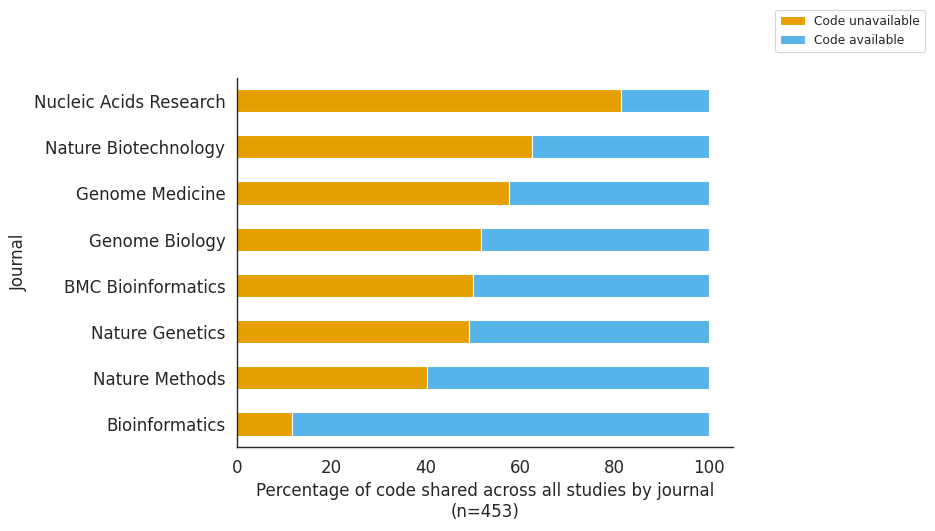

In [316]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#E69F00','#56B4E9']
#sns.barplot(data=df_temp, x='Journal', y='Percentage',hue='Code availability (Yes/No)',ci=None,palette=color)
df_temp.plot(kind='barh', stacked=True, color=color)
#, palette=colors)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.2),labels=['Code unavailable','Code available'])
#for index, row in df_temp.iterrows():
#    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
#                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

sns.despine()
plt.xlabel("Percentage of code shared across all studies by journal\n(n=453)",fontsize=12)
#plt.ylim(0,100)
plt.ylabel("Journal",fontsize=12)
plt.xticks(ha='center')
plt.tick_params(axis='both', labelsize=12)
#plt.savefig('../Figures/sup13.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 2b (Supp 14)

In [374]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [375]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'


In [376]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Journal','Data availability (yes/no)']).size()}).reset_index()
#f_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
labels = {'Bioinformatics':'Bioinformatics', 'Nucleic_Acids_Res':'Nucleic Acids Research', 'Nat_Biotechnol':'Nature Biotechnology', 'Genome_Med':'Genome Medicine', 'Nat_Methods':'Nature Methods', 'Genome_Biol':'Genome Biology','Nat_Genet':'Nature Genetics','BMC_Bioinformatics':'BMC Bioinformatics'}
df_temp['Journal'] = df_temp['Journal'].replace(labels)
#add percentage column
percentages=[]
for index, row in df_temp.iterrows():
   value=(row['Counts']/df_temp.loc[(df_temp['Journal'] == row['Journal'])]['Counts'].sum())*100
   percentages.append(value)
df_temp['Percentage']=percentages
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Journal,Data availability (yes/no),Counts,Percentage
4,Genome Biology,no,1,4.00
10,Nature Genetics,no,4,11.76
8,Nature Biotechnology,no,12,31.58
1,BMC Bioinformatics,yes,2,33.33
6,Genome Medicine,no,8,33.33
12,Nature Methods,no,14,36.84
14,Nucleic Acids Research,no,18,48.65
2,Bioinformatics,no,1,50.00
3,Bioinformatics,yes,1,50.00
15,Nucleic Acids Research,yes,19,51.35


In [377]:
df_temp=df_temp.pivot(index='Journal',columns='Data availability (yes/no)',values='Percentage')
df_temp=df_temp.reset_index()
df_temp['Journal']=pd.Categorical(df_temp['Journal'],categories=order)
df_temp=df_temp.sort_values('Journal')
df_temp=df_temp.set_index('Journal')
df_temp

Data availability (yes/no),no,yes
Journal,,
Bioinformatics,50.00,50.00
Nature Methods,36.84,63.16
Nature Genetics,11.76,88.24
BMC Bioinformatics,66.67,33.33
Genome Biology,4.00,96.00
Genome Medicine,33.33,66.67
Nature Biotechnology,31.58,68.42
Nucleic Acids Research,48.65,51.35


<Figure size 1000x1000 with 0 Axes>

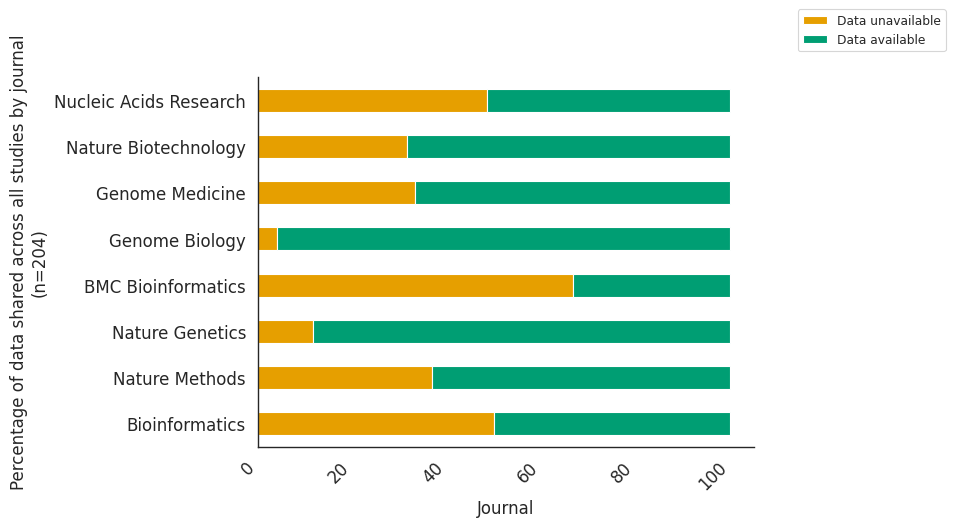

In [378]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#E69F00','#009E73']
df_temp.plot(kind='barh', stacked=True, color=color)
#, palette=colors)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.2),labels=['Data unavailable','Data available'])
#for index, row in df_temp.iterrows():
#    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
#                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

sns.despine()
plt.ylabel("Percentage of data shared across all studies by journal\n(n=204)",fontsize=12)
#plt.ylim(0,100)
plt.xlabel("Journal",fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', labelsize=12)
#plt.savefig('../Figures/sup14.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 2c (Supp 11)

In [5]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [6]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

In [7]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Code availability (Yes/No)','Code Policy']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Secondary analysis,Code availability (Yes/No),Code Policy,Counts,Percentage
2,no,yes,Encouraged,14,6.86
0,no,no,Encouraged,53,25.98
3,no,yes,Mandatory,60,29.41
1,no,no,Mandatory,77,37.75


In [8]:
df_temp_pivot=df_temp.pivot(index='Code Policy',columns='Code availability (Yes/No)',values='Counts')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Code Unavailable","yes":"Code Available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Code Available', 'Code Unavailable'])
df_temp_pivot

Code availability (Yes/No),Code Available,Code Unavailable
Code Policy,,
Encouraged,14,53
Mandatory,60,77


In [9]:

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df_temp_pivot)

# Display the test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 9.241015886619984
P-value: 0.00236653625855266


### OR for How likely were articles to share their code if the journal only encouraged sharing code

In [10]:
#stat=odds_ratio([[63,108],[163,119]])
stat=odds_ratio([df_temp_pivot.values[1],df_temp_pivot.values[0]])
res = fisher_exact(df_temp_pivot.values, alternative='two-sided')
print(stat.statistic,res.pvalue)

2.934875129238918 0.0018007030647661246


### OR for How likely were articles to share their code if the journal mandated code sharing

In [11]:
#stat=odds_ratio([[63,108],[163,119]])
stat=odds_ratio([df_temp_pivot.values[0],df_temp_pivot.values[1]])
res = fisher_exact(df_temp_pivot.values, alternative='two-sided')
print(stat.statistic,res.pvalue)

0.3407299990508732 0.0018007030647661246


In [46]:
df_temp_pivot=df_temp.pivot(index='Code Policy',columns='Code availability (Yes/No)',values='Percentage')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Code Unavailable","yes":"Code Available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Code Available', 'Code Unavailable'])
df_temp_pivot

Code availability (Yes/No),Code Available,Code Unavailable
Code Policy,,
Encouraged,6.86,25.98
Mandatory,29.41,37.75


<Figure size 3600x3600 with 0 Axes>

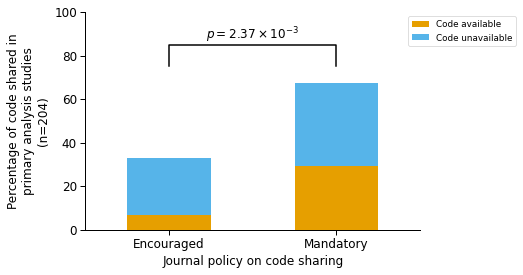

In [52]:
plt.figure(figsize=(50, 50))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#56B4E9','#E69F00']
#sns.barplot(data=df_temp, x='Code Policy', y='Percentage',hue='Code availability (Yes/No)', ci=None,palette=color)
df_temp_pivot.plot(kind='bar', stacked=True, color=color, rot=0)
plt.legend(labels=['Code available','Code unavailable'],loc='upper right', bbox_to_anchor=(1.3, 1))
# statistical annotation
y, h, col = 75, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,2)), ha='center', va='bottom', color=col, fontsize=12)
sns.despine()
plt.ylabel("Percentage of code shared in\nprimary analysis studies\n(n=204)",fontsize=12)
plt.ylim(0,100)
plt.xlabel("Journal policy on code sharing",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
#plt.savefig('../Figures/sup11.png', format='png', dpi=300)
plt.show()

## Figure 2d (Supp 12)

In [60]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [61]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()


df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'


In [62]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Data availability (yes/no)','Data Policy']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Secondary analysis,Data availability (yes/no),Data Policy,Counts,Percentage
0,no,no,Encouraged,12,5.88
2,no,yes,Encouraged,18,8.82
1,no,no,Mandatory,50,24.51
3,no,yes,Mandatory,124,60.78


In [63]:
df_temp_pivot=df_temp.pivot(index='Data Policy',columns='Data availability (yes/no)',values='Counts')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Data unavailable","yes":"Data available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Data available', 'Data unavailable'])
df_temp_pivot

Data availability (yes/no),Data available,Data unavailable
Data Policy,,
Encouraged,18,12
Mandatory,124,50


In [64]:

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df_temp_pivot)

# Display the test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 1.0484607310156826
P-value: 0.30586186082510286


### OR for How likely were articles to share their code if the journal only encouraged sharing code

In [65]:
#stat=odds_ratio([[63,108],[163,119]])
stat=odds_ratio([df_temp_pivot.values[1],df_temp_pivot.values[0]])
res = fisher_exact(df_temp_pivot.values, alternative='two-sided')
print(stat.statistic,res.pvalue)

1.6489900609856623 0.28184485090076145


### OR for How likely were articles to share their code if the journal mandated code sharing

In [66]:
#stat=odds_ratio([[63,108],[163,119]])
stat=odds_ratio([df_temp_pivot.values[0],df_temp_pivot.values[1]])
res = fisher_exact(df_temp_pivot.values, alternative='two-sided')
print(stat.statistic,res.pvalue)

0.6064317934107323 0.28184485090076145


In [68]:
df_temp_pivot=df_temp.pivot(index='Data Policy',columns='Data availability (yes/no)',values='Percentage')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Data unavailable","yes":"Data available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Data available', 'Data unavailable'])
df_temp_pivot

Data availability (yes/no),Data available,Data unavailable
Data Policy,,
Encouraged,8.82,5.88
Mandatory,60.78,24.51


<Figure size 3600x3600 with 0 Axes>

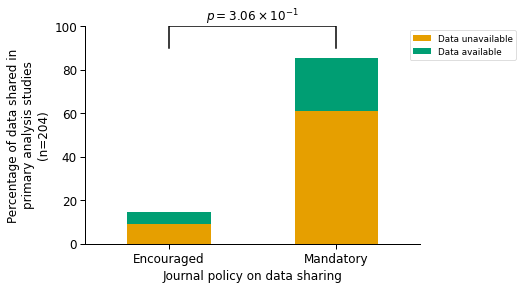

In [87]:
plt.figure(figsize=(50, 50))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#E69F00','#009E73']
#sns.barplot(data=df_temp, x='Data Policy', y='Percentage',hue='Data availability (yes/no)',ci=None,palette=color)
df_temp_pivot.plot(kind='bar', stacked=True, color=color, rot=0)

#, palette=colors)
plt.legend(labels=['Data unavailable','Data available'],loc='upper right', bbox_to_anchor=(1.3, 1))
#for index, row in df_temp.iterrows():
#    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
#                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# statistical annotation
y, h, col = 90, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,2)), ha='center', va='bottom', color=col, fontsize=12)

sns.despine()
plt.ylabel("Percentage of data shared in\nprimary analysis studies\n(n=204)",fontsize=12)
plt.ylim(0,100)
plt.xlabel("Journal policy on data sharing",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('../Figures/sup12.png', format='png', dpi=300)
plt.show()

## Figure 2e (Supp 16)

In [5]:
df_journal=pd.read_csv("../data/journal_data.csv")

In [6]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#replace upon request with no in the Data availability column of the data
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'


In [7]:
#df_modified[~(df_modified['Secondary analysis']=='yes')].groupby(['Code Policy']).size()
df_modified[~(df_modified['Secondary analysis']=='yes')].groupby(['Code Policy','Code availability (Yes/No)']).size()

Code Policy  Code availability (Yes/No)
Encouraged   no                            53
             yes                           14
Mandatory    no                            77
             yes                           60
dtype: int64

In [267]:
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis','Code Policy']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
#df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='yes'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp_mandatory_no=df_temp[((df_temp['Code Policy']=='Mandatory') & (df_temp['Code availability (Yes/No)']=='no') )]
df_temp_mandatory_yes=df_temp[((df_temp['Code Policy']=='Mandatory') & (df_temp['Code availability (Yes/No)']=='yes') )]


df_temp_encouraged_no=df_temp[((df_temp['Code Policy']=='Encouraged') & (df_temp['Code availability (Yes/No)']=='no') )]
df_temp_encouraged_yes=df_temp[((df_temp['Code Policy']=='Encouraged') & (df_temp['Code availability (Yes/No)']=='yes') )]



df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/137) * 100
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Cumulative Percent Increase'].round(2)
df_temp_mandatory_no=df_temp_mandatory_no.reset_index()
df_temp_mandatory_no=df_temp_mandatory_no.drop('index', axis=1)

df_temp_mandatory_yes['Percent Increase'] = (df_temp_mandatory_yes['Counts']/137) * 100
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Percent Increase'].cumsum()
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Cumulative Percent Increase'].round(2)
df_temp_mandatory_yes=df_temp_mandatory_yes.reset_index()
df_temp_mandatory_yes=df_temp_mandatory_yes.drop('index', axis=1)



df_temp_encouraged_no['Percent Increase'] = (df_temp_encouraged_no['Counts']/67) * 100
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Percent Increase'].cumsum()
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Cumulative Percent Increase'].round(2)
df_temp_encouraged_no=df_temp_encouraged_no.reset_index()
df_temp_encouraged_no=df_temp_encouraged_no.drop('index', axis=1)


df_temp_encouraged_yes['Percent Increase'] = (df_temp_encouraged_yes['Counts']/67) * 100
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Percent Increase'].cumsum()
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Cumulative Percent Increase'].round(2)
df_temp_encouraged_yes=df_temp_encouraged_yes.reset_index()
df_temp_encouraged_yes=df_temp_encouraged_yes.drop('index', axis=1)

df_temp=pd.concat([df_temp_mandatory_yes,df_temp_mandatory_no,df_temp_encouraged_yes,df_temp_encouraged_no])
df_temp


/tmp/ipykernel_589/1479057679.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/137) * 100
/tmp/ipykernel_589/1479057679.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
/tmp/ipykernel_589/1479057679.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Code availability (Yes/No),PMC_Year,Secondary analysis,Code Policy,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,no,Mandatory,9,6.569343,6.57
1,yes,2017,no,Mandatory,5,3.649635,10.22
2,yes,2018,no,Mandatory,5,3.649635,13.87
3,yes,2019,no,Mandatory,13,9.489051,23.36
4,yes,2020,no,Mandatory,14,10.218978,33.58
5,yes,2021,no,Mandatory,14,10.218978,43.80
0,no,2016,no,Mandatory,9,6.569343,6.57
1,no,2017,no,Mandatory,24,17.518248,24.09
2,no,2018,no,Mandatory,14,10.218978,34.31
3,no,2019,no,Mandatory,16,11.678832,45.99


In [268]:
df_temp=df_temp.pivot(index=['PMC_Year'],columns=['Code Policy','Code availability (Yes/No)'],values='Cumulative Percent Increase')
df_temp=df_temp.fillna(0)
df_temp

Code Policy                Mandatory        Encouraged       
Code availability (Yes/No)       yes     no        yes     no
PMC_Year                                                     
2016                            6.57   6.57       0.00  11.94
2017                           10.22  24.09       4.48  26.87
2018                           13.87  34.31       5.97  40.30
2019                           23.36  45.99      10.45  50.75
2020                           33.58  51.09      17.91  65.67
2021                           43.80  56.20      20.90  79.10

<Figure size 2000x2000 with 0 Axes>

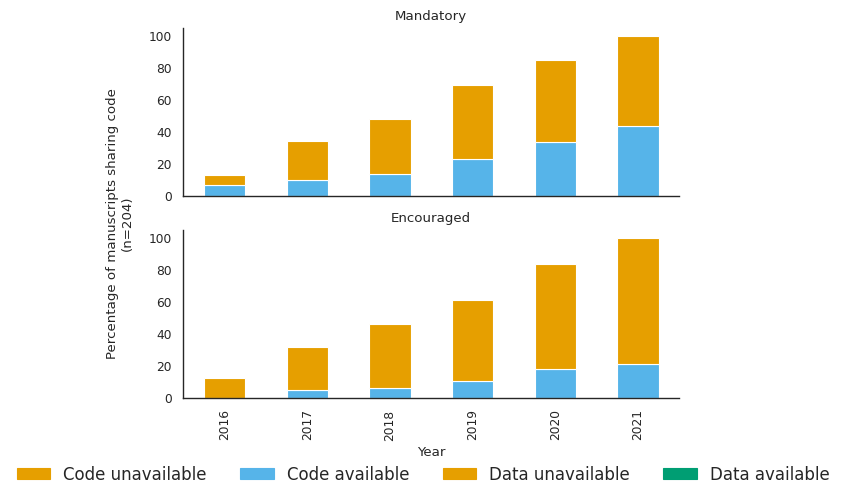

In [269]:

plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors=['#56B4E9','#E69F00']
fontsize=12
#sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',hue='Code Policy',palette=colors )
#df_temp.plot(kind='bar',stacked=True,)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
df_temp['Mandatory'].plot(kind='bar',stacked=True,color=colors,ax=ax1,xticks=[],legend=None,title='Mandatory')
df_temp['Encouraged'].plot(kind='bar',stacked=True,color=colors,ax=ax2,legend=None,title='Encouraged')
ax1.set_xlabel('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of manuscripts sharing code\n(n=204)')
ax2.yaxis.set_label_coords(-0.1,1.04)
#df_temp.plot(kind='bar',ax=ax1,color=colors,subplots=True)
#, palette=colors)
#for index, row in df_temp.iterrows():
#    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
#                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
#ax1.set_xticklabels(['Encouraged', 'Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory','Encouraged', 'Mandatory'])
#ax1.set_ylabel("Cumulative code-sharing\nprimary analysis manuscript growth\nby journal policy (%)",fontsize=12)
#ax1.set_ylim([0, 100])
#ax1.tick_params(axis='both', labelsize=12)
#ax1.set_xlabel("",fontsize=12)

# Second X-axis
#ax2 = ax1.twiny()

#ax2.spines["bottom"].set_position(("axes", -0.40))
#ax2.tick_params('both', length=0, width=0, which='minor')
#ax2.tick_params('both', direction='in', which='major')
#ax2.xaxis.set_ticks_position("bottom")
#ax2.xaxis.set_label_position("bottom")

#ax2.set_xticks([0.0,0.17,0.33,0.50,0.67,0.83,1.0])
##ax2.xaxis.set_major_formatter(ticker.NullFormatter())
#ax2.xaxis.set_minor_locator(ticker.FixedLocator([0,0.09,0.25,0.42,0.58,0.75,0.92]))
#ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['2016','2017','2018','2019','2020','2021']))
#ax2.set_xlabel("Year",fontsize=12)
labels = [mpatches.Patch(color='#E69F00', label="Code unavailable"),
mpatches.Patch(color='#56B4E9', label="Code available"),
mpatches.Patch(color='#E69F00', label="Data unavailable"),
mpatches.Patch(color='#009E73', label="Data available"),] 
fig.legend(handles=labels, 
           loc="lower center",ncol=len(labels),fontsize=fontsize,bbox_to_anchor=(0.5, -.1),frameon=False) 

sns.despine()
#plt.savefig('../Figures/sup4.png', format='png', dpi=300)
plt.show()

In [27]:
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis','Code Policy']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
#df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='yes'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
df_temp['Normalized']=0
years=[2016,2017,2018,2019,2020,2021]
for year in years:
    df_temp.loc[(df_temp['PMC_Year']==year),'Normalized']=(df_temp.loc[(df_temp['PMC_Year']==year),'Counts']/df_temp.loc[((df_temp['PMC_Year']==year)),'Counts'].sum())*100
df_temp


,Code availability (Yes/No),PMC_Year,Secondary analysis,Code Policy,Counts,Normalized
0,no,2016,no,Encouraged,8,30.769231
1,no,2016,no,Mandatory,9,34.615385
4,no,2017,no,Encouraged,10,23.809524
5,no,2017,no,Mandatory,24,57.142857
8,no,2018,no,Encouraged,9,31.034483
9,no,2018,no,Mandatory,14,48.275862
12,no,2019,no,Encouraged,7,17.948718
13,no,2019,no,Mandatory,16,41.025641
16,no,2020,no,Encouraged,10,27.777778
17,no,2020,no,Mandatory,7,19.444444


In [29]:
df_temp=df_temp.pivot(index=['PMC_Year'],columns=['Code Policy','Code availability (Yes/No)'],values='Normalized')
df_temp=df_temp.fillna(0)
df_temp

Code Policy                Encouraged  Mandatory            Encouraged
Code availability (Yes/No)         no         no        yes        yes
PMC_Year                                                              
2016                        30.769231  34.615385  34.615385   0.000000
2017                        23.809524  57.142857  11.904762   7.142857
2018                        31.034483  48.275862  17.241379   3.448276
2019                        17.948718  41.025641  33.333333   7.692308
2020                        27.777778  19.444444  38.888889  13.888889
2021                        28.125000  21.875000  43.750000   6.250000

<Figure size 2000x2000 with 0 Axes>

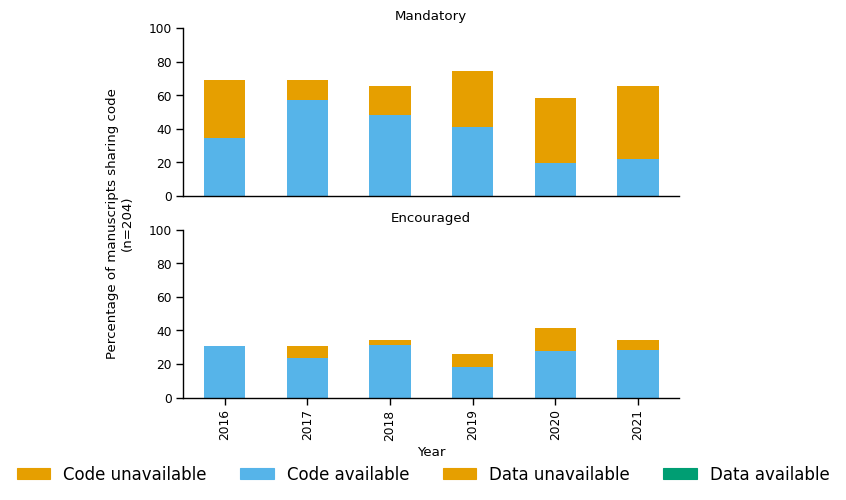

In [31]:

plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors=['#56B4E9','#E69F00']
fontsize=12
#sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',hue='Code Policy',palette=colors )
#df_temp.plot(kind='bar',stacked=True,)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
df_temp['Mandatory'].plot(kind='bar',stacked=True,color=colors,ax=ax1,xticks=[],legend=None,title='Mandatory')
df_temp['Encouraged'].plot(kind='bar',stacked=True,color=colors,ax=ax2,legend=None,title='Encouraged')
ax1.set_xlabel('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of manuscripts sharing code\n(n=204)')
ax2.yaxis.set_label_coords(-0.1,1.04)
ax2.set_ylim(0,100)
ax1.set_ylim(0,100)
labels = [mpatches.Patch(color='#E69F00', label="Code unavailable"),
mpatches.Patch(color='#56B4E9', label="Code available"),
mpatches.Patch(color='#E69F00', label="Data unavailable"),
mpatches.Patch(color='#009E73', label="Data available"),] 
fig.legend(handles=labels, 
           loc="lower center",ncol=len(labels),fontsize=fontsize,bbox_to_anchor=(0.5, -.1),frameon=False) 

sns.despine()
plt.show()

## Figure 2f (Supp 17)

In [121]:
df_journal=pd.read_csv("../data/journal_data.csv")

In [122]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#replace upon request with no in the Data availability column of the data
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

In [123]:
df_modified[~(df_modified['Secondary analysis']=='yes')].groupby(['Data Policy']).size()

Data Policy
Encouraged     30
Mandatory     174
dtype: int64

In [124]:

#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','PMC_Year','Secondary analysis','Data Policy']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
#df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='yes'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp_mandatory_no=df_temp[((df_temp['Data Policy']=='Mandatory') & (df_temp['Data availability (yes/no)']=='no') )]
df_temp_mandatory_yes=df_temp[((df_temp['Data Policy']=='Mandatory') & (df_temp['Data availability (yes/no)']=='yes') )]


df_temp_encouraged_no=df_temp[((df_temp['Data Policy']=='Encouraged') & (df_temp['Data availability (yes/no)']=='no') )]
df_temp_encouraged_yes=df_temp[((df_temp['Data Policy']=='Encouraged') & (df_temp['Data availability (yes/no)']=='yes') )]


df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/174) * 100
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Cumulative Percent Increase'].round(2)
df_temp_mandatory_no=df_temp_mandatory_no.reset_index()
df_temp_mandatory_no=df_temp_mandatory_no.drop('index', axis=1)

df_temp_mandatory_yes['Percent Increase'] = (df_temp_mandatory_yes['Counts']/174) * 100
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Percent Increase'].cumsum()
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Cumulative Percent Increase'].round(2)
df_temp_mandatory_yes=df_temp_mandatory_yes.reset_index()
df_temp_mandatory_yes=df_temp_mandatory_yes.drop('index', axis=1)



df_temp_encouraged_no['Percent Increase'] = (df_temp_encouraged_no['Counts']/30) * 100
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Percent Increase'].cumsum()
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Cumulative Percent Increase'].round(2)
df_temp_encouraged_no=df_temp_encouraged_no.reset_index()
df_temp_encouraged_no=df_temp_encouraged_no.drop('index', axis=1)


df_temp_encouraged_yes['Percent Increase'] = (df_temp_encouraged_yes['Counts']/30) * 100
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Percent Increase'].cumsum()
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Cumulative Percent Increase'].round(2)
df_temp_encouraged_yes=df_temp_encouraged_yes.reset_index()
df_temp_encouraged_yes=df_temp_encouraged_yes.drop('index', axis=1)

df_temp=pd.concat([df_temp_mandatory_yes,df_temp_mandatory_no,df_temp_encouraged_yes,df_temp_encouraged_no])
df_temp

/tmp/ipykernel_589/2708132939.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/174) * 100
/tmp/ipykernel_589/2708132939.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
/tmp/ipykernel_589/2708132939.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,Data availability (yes/no),PMC_Year,Secondary analysis,Data Policy,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,no,Mandatory,15,8.620690,8.62
1,yes,2017,no,Mandatory,22,12.643678,21.26
2,yes,2018,no,Mandatory,20,11.494253,32.76
3,yes,2019,no,Mandatory,24,13.793103,46.55
4,yes,2020,no,Mandatory,16,9.195402,55.75
5,yes,2021,no,Mandatory,27,15.517241,71.26
0,no,2016,no,Mandatory,5,2.873563,2.87
1,no,2017,no,Mandatory,14,8.045977,10.92
2,no,2018,no,Mandatory,6,3.448276,14.37
3,no,2019,no,Mandatory,12,6.896552,21.26


In [125]:
#df_temp=df_temp.pivot(index='PMC_Year',columns='Data Policy',values='Cumulative Percent Increase')
df_temp=df_temp.pivot(index=['PMC_Year'],columns=['Data Policy','Data availability (yes/no)'],values='Cumulative Percent Increase')
df_temp=df_temp.fillna(0)
df_temp

Data Policy                Mandatory        Encouraged       
Data availability (yes/no)       yes     no        yes     no
PMC_Year                                                     
2016                            8.62   2.87      13.33   6.67
2017                           21.26  10.92      26.67  13.33
2018                           32.76  14.37      30.00  20.00
2019                           46.55  21.26      33.33  26.67
2020                           55.75  28.16      50.00  36.67
2021                           71.26  28.74      60.00  40.00

<Figure size 1000x1000 with 0 Axes>

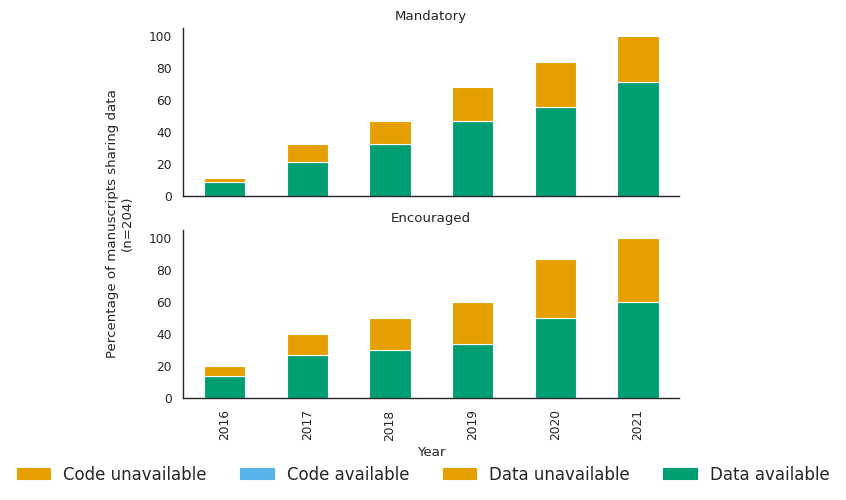

In [134]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#009E73','#E69F00']
fontsize=12
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
df_temp['Mandatory'].plot(kind='bar',stacked=True,color=color,ax=ax1,xticks=[],legend=None,title='Mandatory')
df_temp['Encouraged'].plot(kind='bar',stacked=True,color=color,ax=ax2,legend=None,title='Encouraged')
ax1.set_xlabel('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of manuscripts sharing data\n(n=204)')
ax2.yaxis.set_label_coords(-0.1,1.04)











#fig1, ax1 = plt.subplots(1)
#sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',hue='Data Policy',palette=color)
#df_temp.plot(kind='bar', stacked=True, color=color,ax=ax1)
#for index, row in df_temp.iterrows():
#    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
#                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
#ax1.set_xticklabels(['Encouraged', 'Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory','Encouraged', 'Mandatory'])
#ax1.set_ylabel("Cumulative code-sharing\nprimary analysis manuscript growth\nby journal policy (%)",fontsize=12)
#ax1.set_ylim([0, 100])
#ax1.tick_params(axis='both', labelsize=12)
#ax1.set_xlabel("",fontsize=12)

# Second X-axis
#ax2 = ax1.twiny()

#ax2.spines["bottom"].set_position(("axes", -0.40))
#ax2.tick_params('both', length=0, width=0, which='minor')
#ax2.tick_params('both', direction='in', which='major')
#ax2.xaxis.set_ticks_position("bottom")
#ax2.xaxis.set_label_position("bottom")

#ax2.set_xticks([0.0,0.17,0.33,0.50,0.67,0.83,1.0])
#ax2.xaxis.set_major_formatter(ticker.NullFormatter())
#ax2.xaxis.set_minor_locator(ticker.FixedLocator([0,0.09,0.25,0.42,0.58,0.75,0.92]))
#ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['2016','2017','2018','2019','2020','2021']))
#ax2.set_xlabel("Year",fontsize=12)
labels = [mpatches.Patch(color='#E69F00', label="Code unavailable"),
mpatches.Patch(color='#56B4E9', label="Code available"),
mpatches.Patch(color='#E69F00', label="Data unavailable"),
mpatches.Patch(color='#009E73', label="Data available"),] 
fig.legend(handles=labels, 
           loc="lower center",ncol=len(labels),fontsize=fontsize,bbox_to_anchor=(0.5, -.1),frameon=False) 
sns.despine()


#plt.savefig('../Figures/sup4.png', format='png', dpi=300)
plt.show()

In [181]:
ax

array([[<Axes: xlabel='Percentage of manuscripts (%)\n(n=453)', ylabel='Journal'>,
        <Axes: xlabel='Percentage of manuscripts (%)\n(n=204) ', ylabel='Journal'>],
       [<Axes: xlabel='Journal policy on code sharing', ylabel='Percentage of manuscripts (%)\n(n=204)'>,
        <Axes: xlabel='Journal policy on data sharing', ylabel='Percentage of manuscripts (%)\n(n=204)'>],
       [<Axes: ylabel='Percentage of manuscripts sharing code (%)\n(n=204)'>,
        <Axes: >]], dtype=object)

# Multipanel Figure 2 (Journal Figures)

/tmp/ipykernel_589/4170126712.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/137) * 100
/tmp/ipykernel_589/4170126712.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
/tmp/ipykernel_589/4170126712.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

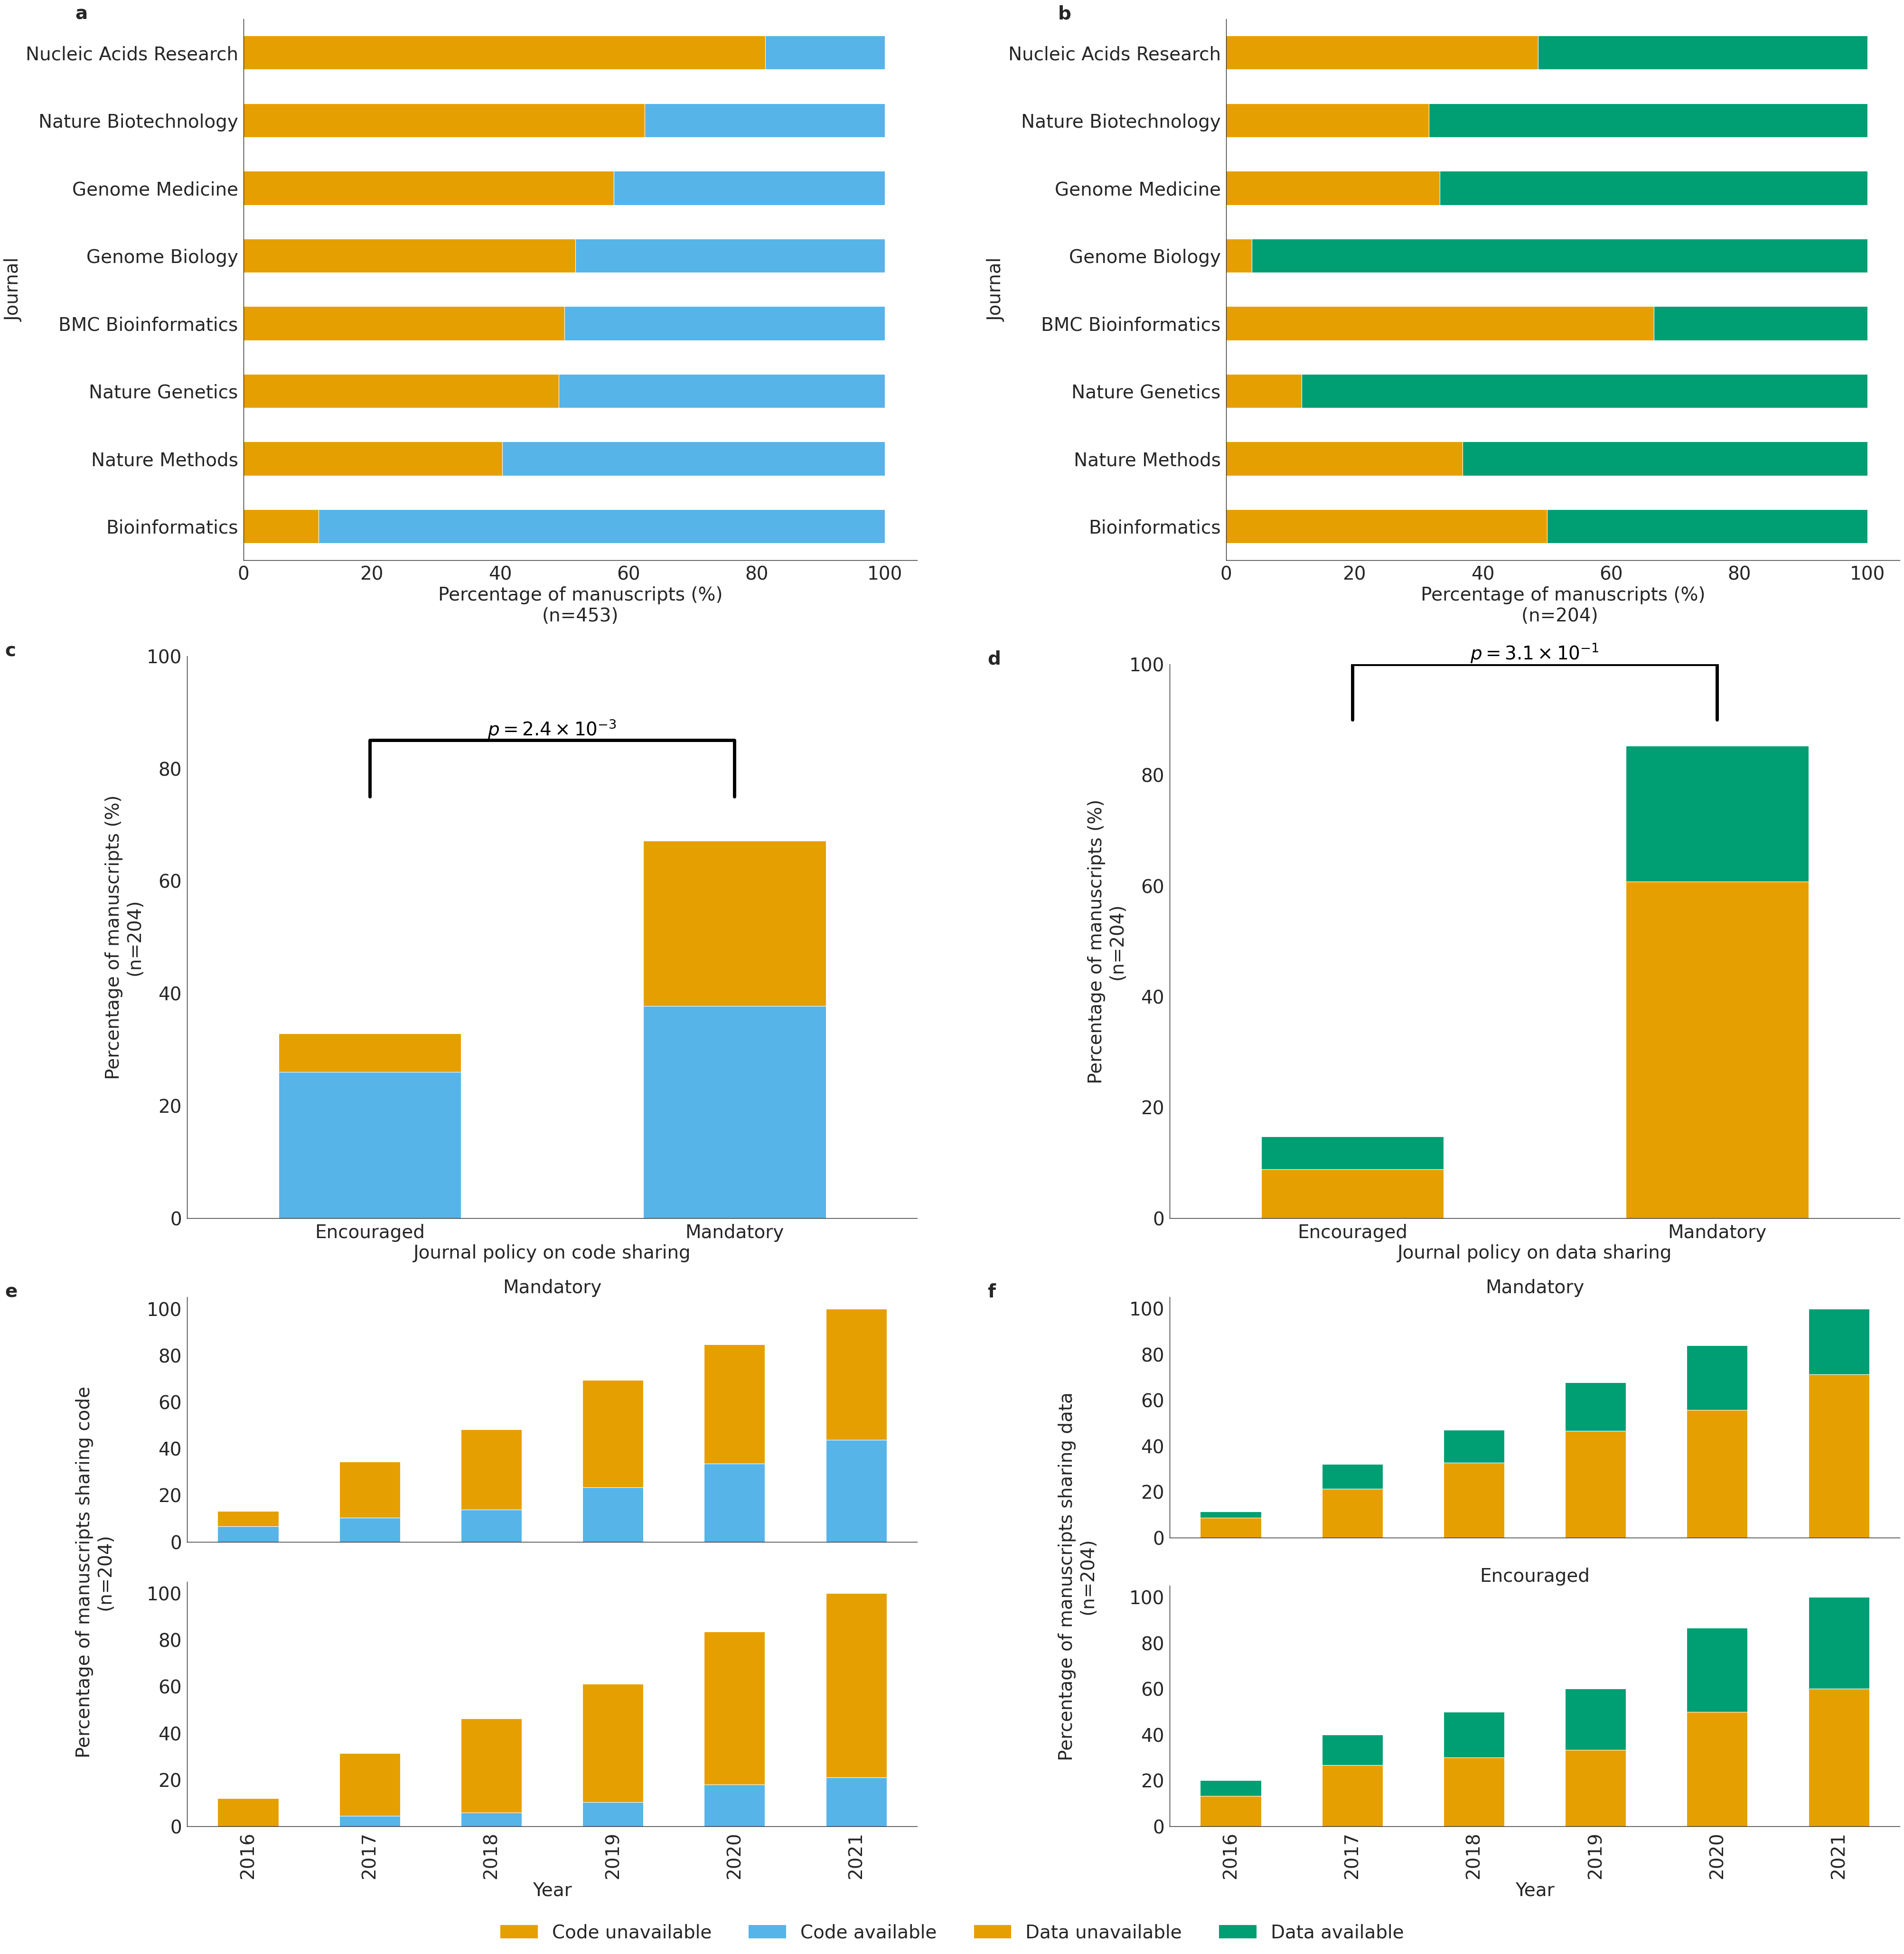

In [259]:
fig = plt.figure(layout='constrained', figsize=(40, 40))
subfigs = fig.subfigures(3, 2, wspace=0.07)
sns.set_style("white")
sns.set_context("paper")
#sns.color_palette("pastel")
rcParams['font.family'] = 'sans-serif'
#sns.set(font_scale=1)
fontsize=28
plt.rcParams.update({'font.size': fontsize})
df_journal=pd.read_csv("../data/journal_data.csv")
#fig 2a 
fig_2a = subfigs[0,0].subplots(1, 1)

df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Journal','Code availability (Yes/No)','Code Policy']).size()}).reset_index()
#replacing journal short names with full names
labels = {'Bioinformatics':'Bioinformatics', 'Nucleic_Acids_Res':'Nucleic Acids Research', 'Nat_Biotechnol':'Nature Biotechnology', 'Genome_Med':'Genome Medicine', 'Nat_Methods':'Nature Methods', 'Genome_Biol':'Genome Biology','Nat_Genet':'Nature Genetics','BMC_Bioinformatics':'BMC Bioinformatics'}
df_temp['Journal'] = df_temp['Journal'].replace(labels)
#add percentage column
percentages=[]
for index, row in df_temp.iterrows():
   value=(row['Counts']/df_temp.loc[(df_temp['Journal'] == row['Journal'])]['Counts'].sum())*100
   percentages.append(value)
df_temp['Percentage']=percentages
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp=df_temp.pivot(index='Journal',columns='Code availability (Yes/No)',values='Percentage')
df_temp=df_temp.sort_values('no', ascending=True)
order=list(df_temp.index)

color=['#E69F00','#56B4E9']
df_temp.plot(kind='barh', stacked=True, color=color,ax=fig_2a,legend=None)
fig_2a.set_xlabel("Percentage of manuscripts (%)\n(n=453)",fontsize=fontsize)
fig_2a.set_ylabel("Journal",fontsize=fontsize)
fig_2a.tick_params(axis='both', labelsize=fontsize)

# fig 2b
fig_2b= subfigs[0,1].subplots(1, 1)
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Journal','Data availability (yes/no)','Data Policy']).size()}).reset_index()
#f_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
labels = {'Bioinformatics':'Bioinformatics', 'Nucleic_Acids_Res':'Nucleic Acids Research', 'Nat_Biotechnol':'Nature Biotechnology', 'Genome_Med':'Genome Medicine', 'Nat_Methods':'Nature Methods', 'Genome_Biol':'Genome Biology','Nat_Genet':'Nature Genetics','BMC_Bioinformatics':'BMC Bioinformatics'}
df_temp['Journal'] = df_temp['Journal'].replace(labels)
#add percentage column
percentages=[]
for index, row in df_temp.iterrows():
   value=(row['Counts']/df_temp.loc[(df_temp['Journal'] == row['Journal'])]['Counts'].sum())*100
   percentages.append(value)
df_temp['Percentage']=percentages
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp=df_temp.pivot(index='Journal',columns='Data availability (yes/no)',values='Percentage')
df_temp=df_temp.reset_index()
df_temp['Journal']=pd.Categorical(df_temp['Journal'],categories=order)
df_temp=df_temp.sort_values('Journal')
df_temp=df_temp.set_index('Journal')
color=['#E69F00','#009E73']
df_temp.plot(kind='barh', stacked=True, color=color, ax=fig_2b,legend=None)
fig_2b.set_xlabel("Percentage of manuscripts (%)\n(n=204) ",fontsize=fontsize)
fig_2b.set_ylabel("Journal",fontsize=fontsize)
fig_2b.tick_params(axis='both', labelsize=fontsize)

#fig 2c
fig_2c=subfigs[1,0].subplots(1, 1)
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Code availability (Yes/No)','Code Policy']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp_pivot=df_temp.pivot(index='Code Policy',columns='Code availability (Yes/No)',values='Counts')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Code Unavailable","yes":"Code Available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Code Available', 'Code Unavailable'])
chi2, p, dof, expected = chi2_contingency(df_temp_pivot)
df_temp_pivot=df_temp.pivot(index='Code Policy',columns='Code availability (Yes/No)',values='Percentage')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Code Unavailable","yes":"Code Available"})
color=['#56B4E9','#E69F00']
df_temp_pivot.plot(kind='bar', stacked=True, color=color, rot=0, ax=fig_2c,legend=None)
# statistical annotation
y, h, col = 75, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
fig_2c.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=5, c=col)
fig_2c.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize=fontsize)
fig_2c.set_ylabel("Percentage of manuscripts (%)\n(n=204)",fontsize=fontsize)
fig_2c.set_ylim(0,100)
fig_2c.set_xlabel("Journal policy on code sharing",fontsize=fontsize)
fig_2c.tick_params(axis='both', labelsize=fontsize)

#fig 2d
fig_2d=subfigs[1,1].subplots(1, 1)
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()


df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Data availability (yes/no)','Data Policy']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp_pivot=df_temp.pivot(index='Data Policy',columns='Data availability (yes/no)',values='Counts')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Data unavailable","yes":"Data available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Data available', 'Data unavailable'])
chi2, p, dof, expected = chi2_contingency(df_temp_pivot)
df_temp_pivot=df_temp.pivot(index='Data Policy',columns='Data availability (yes/no)',values='Percentage')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Data unavailable","yes":"Data available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Data available', 'Data unavailable'])
color=['#E69F00','#009E73']
df_temp_pivot.plot(kind='bar', stacked=True, color=color, rot=0,ax=fig_2d,legend=None)
# statistical annotation
y, h, col = 90, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
fig_2d.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=5, c=col)
fig_2d.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize=fontsize)
fig_2d.set_ylabel("Percentage of manuscripts (%)\n(n=204)",fontsize=fontsize)
fig_2d.set_ylim(0,100)
fig_2d.set_xlabel("Journal policy on data sharing",fontsize=fontsize)
fig_2d.tick_params(axis='both', labelsize=fontsize)

#fig 2e
fig_2e=subfigs[2,0].subplots(2, 1)
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#replace upon request with no in the Data availability column of the data
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis','Code Policy']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
#df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='yes'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp_mandatory_no=df_temp[((df_temp['Code Policy']=='Mandatory') & (df_temp['Code availability (Yes/No)']=='no') )]
df_temp_mandatory_yes=df_temp[((df_temp['Code Policy']=='Mandatory') & (df_temp['Code availability (Yes/No)']=='yes') )]


df_temp_encouraged_no=df_temp[((df_temp['Code Policy']=='Encouraged') & (df_temp['Code availability (Yes/No)']=='no') )]
df_temp_encouraged_yes=df_temp[((df_temp['Code Policy']=='Encouraged') & (df_temp['Code availability (Yes/No)']=='yes') )]



df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/137) * 100
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Cumulative Percent Increase'].round(2)
df_temp_mandatory_no=df_temp_mandatory_no.reset_index()
df_temp_mandatory_no=df_temp_mandatory_no.drop('index', axis=1)

df_temp_mandatory_yes['Percent Increase'] = (df_temp_mandatory_yes['Counts']/137) * 100
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Percent Increase'].cumsum()
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Cumulative Percent Increase'].round(2)
df_temp_mandatory_yes=df_temp_mandatory_yes.reset_index()
df_temp_mandatory_yes=df_temp_mandatory_yes.drop('index', axis=1)



df_temp_encouraged_no['Percent Increase'] = (df_temp_encouraged_no['Counts']/67) * 100
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Percent Increase'].cumsum()
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Cumulative Percent Increase'].round(2)
df_temp_encouraged_no=df_temp_encouraged_no.reset_index()
df_temp_encouraged_no=df_temp_encouraged_no.drop('index', axis=1)


df_temp_encouraged_yes['Percent Increase'] = (df_temp_encouraged_yes['Counts']/67) * 100
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Percent Increase'].cumsum()
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Cumulative Percent Increase'].round(2)
df_temp_encouraged_yes=df_temp_encouraged_yes.reset_index()
df_temp_encouraged_yes=df_temp_encouraged_yes.drop('index', axis=1)

df_temp=pd.concat([df_temp_mandatory_yes,df_temp_mandatory_no,df_temp_encouraged_yes,df_temp_encouraged_no])
df_temp=df_temp.pivot(index=['PMC_Year'],columns=['Code Policy','Code availability (Yes/No)'],values='Cumulative Percent Increase')
df_temp=df_temp.fillna(0)
colors=['#56B4E9','#E69F00']
df_temp['Mandatory'].plot(kind='bar',stacked=True,color=colors,ax=fig_2e[0],xticks=[],legend=None,fontsize=fontsize)
df_temp['Encouraged'].plot(kind='bar',stacked=True,color=colors,ax=fig_2e[1],legend=None,fontsize=fontsize)
fig_2e[0].set_xlabel('')
fig_2e[0].set_title('Mandatory',fontsize=fontsize)
fig_2e[1].set_xlabel('Year',fontsize=fontsize)
fig_2e[1].set_ylabel('Percentage of manuscripts sharing code\n(n=204)',fontsize=fontsize)
fig_2e[1].yaxis.set_label_coords(-0.1,1.04)

#fig 2f
fig_2f=subfigs[2,1].subplots(2, 1)
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#replace upon request with no in the Data availability column of the data
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','PMC_Year','Secondary analysis','Data Policy']).size()}).reset_index()

#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp_mandatory_no=df_temp[((df_temp['Data Policy']=='Mandatory') & (df_temp['Data availability (yes/no)']=='no') )]
df_temp_mandatory_yes=df_temp[((df_temp['Data Policy']=='Mandatory') & (df_temp['Data availability (yes/no)']=='yes') )]


df_temp_encouraged_no=df_temp[((df_temp['Data Policy']=='Encouraged') & (df_temp['Data availability (yes/no)']=='no') )]
df_temp_encouraged_yes=df_temp[((df_temp['Data Policy']=='Encouraged') & (df_temp['Data availability (yes/no)']=='yes') )]


df_temp_mandatory_no['Percent Increase'] = (df_temp_mandatory_no['Counts']/174) * 100
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Percent Increase'].cumsum()
df_temp_mandatory_no['Cumulative Percent Increase']=df_temp_mandatory_no['Cumulative Percent Increase'].round(2)
df_temp_mandatory_no=df_temp_mandatory_no.reset_index()
df_temp_mandatory_no=df_temp_mandatory_no.drop('index', axis=1)

df_temp_mandatory_yes['Percent Increase'] = (df_temp_mandatory_yes['Counts']/174) * 100
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Percent Increase'].cumsum()
df_temp_mandatory_yes['Cumulative Percent Increase']=df_temp_mandatory_yes['Cumulative Percent Increase'].round(2)
df_temp_mandatory_yes=df_temp_mandatory_yes.reset_index()
df_temp_mandatory_yes=df_temp_mandatory_yes.drop('index', axis=1)



df_temp_encouraged_no['Percent Increase'] = (df_temp_encouraged_no['Counts']/30) * 100
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Percent Increase'].cumsum()
df_temp_encouraged_no['Cumulative Percent Increase']=df_temp_encouraged_no['Cumulative Percent Increase'].round(2)
df_temp_encouraged_no=df_temp_encouraged_no.reset_index()
df_temp_encouraged_no=df_temp_encouraged_no.drop('index', axis=1)


df_temp_encouraged_yes['Percent Increase'] = (df_temp_encouraged_yes['Counts']/30) * 100
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Percent Increase'].cumsum()
df_temp_encouraged_yes['Cumulative Percent Increase']=df_temp_encouraged_yes['Cumulative Percent Increase'].round(2)
df_temp_encouraged_yes=df_temp_encouraged_yes.reset_index()
df_temp_encouraged_yes=df_temp_encouraged_yes.drop('index', axis=1)

df_temp=pd.concat([df_temp_mandatory_yes,df_temp_mandatory_no,df_temp_encouraged_yes,df_temp_encouraged_no])
df_temp=df_temp.pivot(index=['PMC_Year'],columns=['Data Policy','Data availability (yes/no)'],values='Cumulative Percent Increase')
df_temp=df_temp.fillna(0)
colors=['#E69F00','#009E73']
df_temp['Mandatory'].plot(kind='bar',stacked=True,color=color,ax=fig_2f[0],xticks=[],legend=None,fontsize=fontsize)
df_temp['Encouraged'].plot(kind='bar',stacked=True,color=color,ax=fig_2f[1],legend=None,fontsize=fontsize)
fig_2f[0].set_xlabel('')
fig_2f[0].set_title('Mandatory',fontsize=fontsize)
fig_2f[1].set_title('Encouraged',fontsize=fontsize)
fig_2f[1].set_xlabel('Year',fontsize=fontsize)
fig_2f[1].set_ylabel('Percentage of manuscripts sharing data\n(n=204)',fontsize=fontsize)
fig_2f[1].yaxis.set_label_coords(-0.1,1.04)


# Add labels to each subplot
letter_annotation(fig_2a, -.25, 1, 'a',fontsize)
letter_annotation(fig_2b, -.25, 1, 'b',fontsize)
letter_annotation(fig_2c, -.25, 1, 'c',fontsize)
letter_annotation(fig_2d, -.25, 1, 'd',fontsize)
letter_annotation(fig_2e[0], -.25, 1, 'e',fontsize)
letter_annotation(fig_2f[0], -.25, 1, 'f',fontsize)


labels = [mpatches.Patch(color='#E69F00', label="Code unavailable"),
mpatches.Patch(color='#56B4E9', label="Code available"),
mpatches.Patch(color='#E69F00', label="Data unavailable"),
mpatches.Patch(color='#009E73', label="Data available"),] 
fig.legend(handles=labels, 
           loc="lower center",ncol=len(labels),fontsize=fontsize,bbox_to_anchor=(0.5, -.03),frameon=False) 

sns.despine()
fig.savefig('../Figures/fig2.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 3

In [427]:
df_modified['Code availability (Yes/No (reason))'].unique()

array(['yes', 'no', 'no (Cannot find the code)',
       'no (available upon request)', 'no (Available upon request)',
       'no (Link expired)', 'no (Link Expired)',
       'no (No access on BitBucket)', 'no (link does Not work)',
       'no (Link not accessible)', 'no '], dtype=object)

In [428]:
df_modified = df.copy()
df_modified.loc[df_modified['Code availability (Yes/No (reason))'] == 'no (Available upon request)', 'Code availability (Yes/No (reason))'] = 'no'

df_modified.loc[df_modified['Code availability (Yes/No (reason))'] == 'no (Link expired)', 'Code availability (Yes/No (reason))'] = 'Link Expired'
df_modified.loc[df_modified['Code availability (Yes/No (reason))'] == 'no (Link Expired)', 'Code availability (Yes/No (reason))'] = 'Link Expired'
df_modified.loc[df_modified['Code availability (Yes/No (reason))'] == 'no (link does Not work)', 'Code availability (Yes/No (reason))'] = 'Link Expired'
df_modified.loc[df_modified['Code availability (Yes/No (reason))'] == 'no (Link not accessible)', 'Code availability (Yes/No (reason))'] = 'Link Expired'
df_modified.loc[df_modified['Code availability (Yes/No (reason))'] == 'no (No access on BitBucket)', 'Code availability (Yes/No (reason))'] = 'Link Expired'
df_modified['Code Sharing Link Expired?']='no'
df_modified.loc[(df_modified['Code availability (Yes/No (reason))'] == 'Link Expired'), 'Code Sharing Link Expired?'] = 'yes'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)','Code Sharing Link Expired?']).size()}).reset_index()
df_temp=df_temp.rename(columns={"If Code availability = yes, where do they share code (supplementary/ GitHub/ other)":"Source"})

#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp.loc[df_temp['Source']=='Zenodo','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Zenodo'].index[0])

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp.loc[df_temp['Source']=='Supplementary','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Supplementary'].index[0])

#adding Website,Github to Github and Website Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp.loc[df_temp['Source']=='Website','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='Website, Github'].index[0])

#drop NA row
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='NA'].index[0])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='NA'].index[0])

#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort data by percentage
df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Source,Code Sharing Link Expired?,Counts,Percentage
0,10xGenomics,no,1,0.43
1,Bitbucket,yes,1,0.43
2,Bioconductor,no,2,0.85
3,CRAN,no,2,0.85
4,Downloadable File,no,2,0.85
5,GitLab,no,2,0.85
6,Sourceforge,no,3,1.28
7,Bitbucket,no,5,2.14
8,Supplementary,no,6,2.56
9,Zenodo,no,14,5.98


<Figure size 1000x1000 with 0 Axes>

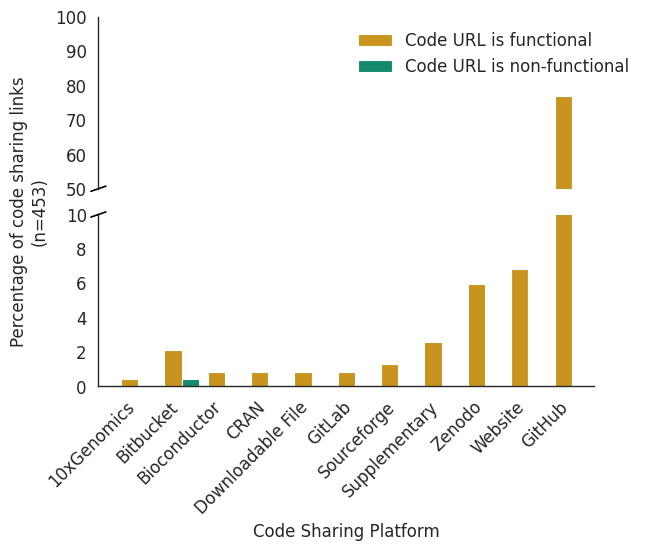

In [521]:
plt.figure(figsize=(10, 10))
fontsize=12
plt.rcParams.update({'font.size': fontsize})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.15})
color=['#E69F00','#009E73']

sns.barplot(data=df_temp, x='Source', y='Percentage',hue='Code Sharing Link Expired?',errorbar=None,palette=color,ax=ax_top)
sns.barplot(data=df_temp, x='Source', y='Percentage',hue='Code Sharing Link Expired?',errorbar=None,palette=color,ax=ax_bottom)
ax_top.set_ylim(50,100)
ax_bottom.set_ylim(0,10)
ax_top.set_ylabel("")
sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)
ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
ax_bottom.legend_.remove()

plt.xticks(rotation=45,ha='right')
ax_bottom.set_ylabel("Percentage of code sharing links\n(n=453)",fontsize=fontsize,loc='center')
ax_bottom.yaxis.set_label_coords(-0.1,1.02)
ax_top.legend(labels=['Code URL is functional','Code URL is non-functional'],loc='upper right', bbox_to_anchor=(1.1, 1),fontsize=fontsize,frameon=False)
plt.xlabel("Code Sharing Platform",fontsize=fontsize)
#plt.yticks(rotation=45, ha='right')
ax_top.tick_params(axis='both', labelsize=fontsize)
ax_bottom.tick_params(axis='both', labelsize=fontsize)
plt.savefig('../Figures/fig3.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

# Supp Figs

## Supplementary Figure 1

## Supplementary Figure 2

In [5]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Data availability (yes/no)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
#df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'yes'
df_temp = df_temp.drop('Secondary analysis', axis=1)

df_temp.loc[df_temp['Data availability (yes/no)'] == 'no', 'Data availability (yes/no)'] = 'No'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'Upon Request'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'yes', 'Data availability (yes/no)'] = 'Yes'


#dealing with both value for Analysis column
df_temp.loc[2,'Counts'] += df_temp.loc[0,'Counts']
df_temp.loc[4,'Counts'] += df_temp.loc[1,'Counts']
df_temp = df_temp.drop(0)
df_temp = df_temp.drop(1)


df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)

df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp

,Data availability (yes/no),Counts,Analysis,Percentage
1,Upon Request,21,Primary Analysis,10.29
0,No,41,Primary Analysis,20.10
2,Yes,142,Primary Analysis,69.61


/tmp/ipykernel_11442/3163558033.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_temp, x='Data availability (yes/no)',y='Percentage', ci=None,palette=color)


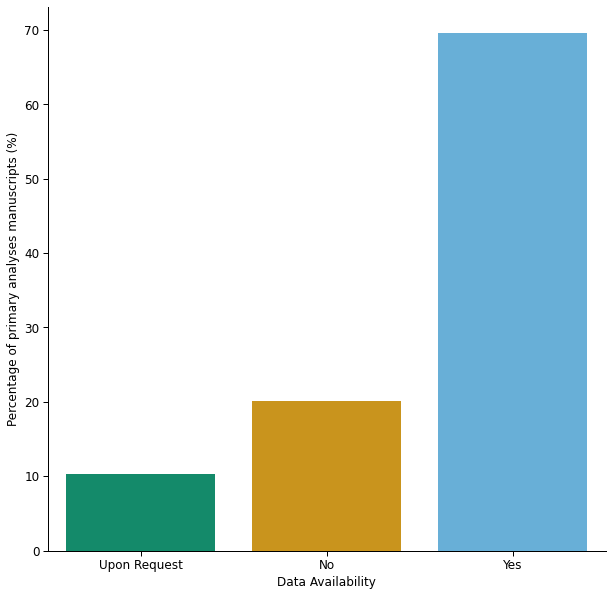

In [6]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#009E73','#E69F00','#56B4E9']
sns.barplot(data=df_temp, x='Data availability (yes/no)',y='Percentage', ci=None,palette=color)
plt.xlabel("Data Availability",fontsize=12)
plt.ylabel("Percentage of primary analyses manuscripts (%)",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup2.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 3

In [7]:
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Data availability statement (yes/no)','Code availability statement (Yes/No)','Secondary analysis']).size()}).reset_index()
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp.loc[5,'Counts'] += df_temp.loc[4,'Counts']
df_temp.loc[8,'Counts'] += df_temp.loc[7,'Counts']
df_temp = df_temp.drop(4)
df_temp = df_temp.drop(7)
#create percentage column
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp


,Data availability statement (yes/no),Code availability statement (Yes/No),Secondary analysis,Counts,Percentage
0,no,no,no,36,17.65
2,no,yes,no,2,0.98
5,yes,no,no,91,44.61
8,yes,yes,no,75,36.76


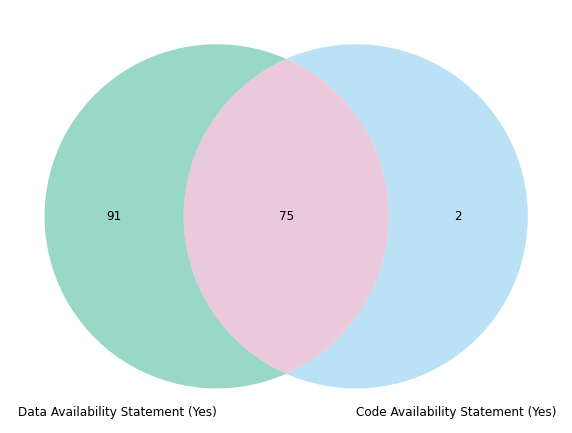

In [8]:
# Use the venn2 function
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
colors = ['#009E73', '#56B4E9','#CC79A7']
venn=venn2_unweighted(subsets = (df_temp['Counts'][5], df_temp['Counts'][2], df_temp['Counts'][8]), set_labels = ('Data Availability Statement (Yes)', 'Code Availability Statement (Yes)'))
venn.get_patch_by_id('10').set_facecolor(colors[0])
venn.get_patch_by_id('01').set_facecolor(colors[1])
venn.get_patch_by_id('11').set_facecolor(colors[2])
for text in venn.set_labels:
    text.set_fontsize(12)
for x in range(len(venn.subset_labels)):
    if venn.subset_labels[x] is not None:
        venn.subset_labels[x].set_fontsize(12)

plt.savefig('../Figures/sup3.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 4

In [9]:

#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#create dataframe for counts data of data availability and code availability, pmc_year, and analysis type 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no') & (df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/204) * 100
#df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
#df_temp['Percentage']=df_temp['Percentage'].round(2)
#df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
#Create labels column
df_temp['Labels']='Unknown'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Data and Code Both Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='no'), 'Labels'] = 'Only Data Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'no') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Only Code Shared'

df_temp


,Data availability (yes/no),Code availability (Yes/No),PMC_Year,Secondary analysis,Counts,Percent Increase,Labels
6,no,yes,2016,no,1,0.490196,Only Code Shared
7,no,yes,2017,no,1,0.490196,Only Code Shared
8,no,yes,2018,no,2,0.980392,Only Code Shared
9,no,yes,2019,no,3,1.470588,Only Code Shared
10,no,yes,2020,no,6,2.941176,Only Code Shared
11,yes,no,2016,no,11,5.392157,Only Data Shared
12,yes,no,2017,no,19,9.313725,Only Data Shared
13,yes,no,2018,no,17,8.333333,Only Data Shared
14,yes,no,2019,no,12,5.882353,Only Data Shared
15,yes,no,2020,no,8,3.921569,Only Data Shared


In [10]:
df_stacked = df_temp[['Labels', 'Percent Increase', 'PMC_Year']]
df_stacked=df_stacked.pivot(index='PMC_Year',columns='Labels', values='Percent Increase')
df_stacked=df_stacked.fillna(0)
df_stacked['Data and Code Both Shared']=df_stacked['Data and Code Both Shared'].cumsum()
df_stacked['Data and Code Both Shared']=df_stacked['Data and Code Both Shared'].round(2)
df_stacked['Only Code Shared']=df_stacked['Only Code Shared'].cumsum()
df_stacked['Only Code Shared']=df_stacked['Only Code Shared'].round(2)
df_stacked['Only Data Shared']=df_stacked['Only Data Shared'].cumsum()
df_stacked['Only Data Shared']=df_stacked['Only Data Shared'].round(2)
df_stacked

Labels,Data and Code Both Shared,Only Code Shared,Only Data Shared
PMC_Year,,,
2016,3.92,0.49,5.39
2017,7.35,0.98,14.71
2018,9.31,1.96,23.04
2019,15.69,3.43,28.92
2020,22.06,6.37,32.84
2021,29.90,6.37,39.71


<Figure size 720x720 with 0 Axes>

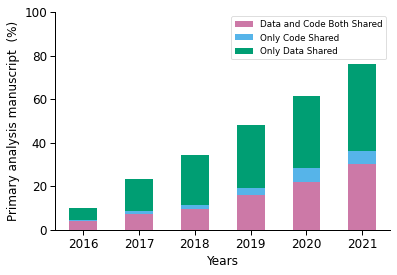

In [11]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
# create stacked bar chart for monthly temperatures
df_stacked.plot(kind='bar', stacked=True,color=['#CC79A7','#56B4E9','#009E73'], rot=0)
plt.ylim([0, 100])
# labels for x & y axis
plt.xlabel("Years",fontsize=12)
plt.ylabel("Primary analysis manuscript  (%)",fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup4.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 5

In [12]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no'))]
#filter df_temp to only have primary studies 
#df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/204) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Data availability (yes/no),PMC_Year,Secondary analysis,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,no,19,9.313725,9.31
1,yes,2017,no,26,12.745098,22.06
2,yes,2018,no,21,10.294118,32.35
3,yes,2019,no,25,12.254902,44.61
4,yes,2020,no,21,10.294118,54.90
5,yes,2021,no,30,14.705882,69.61


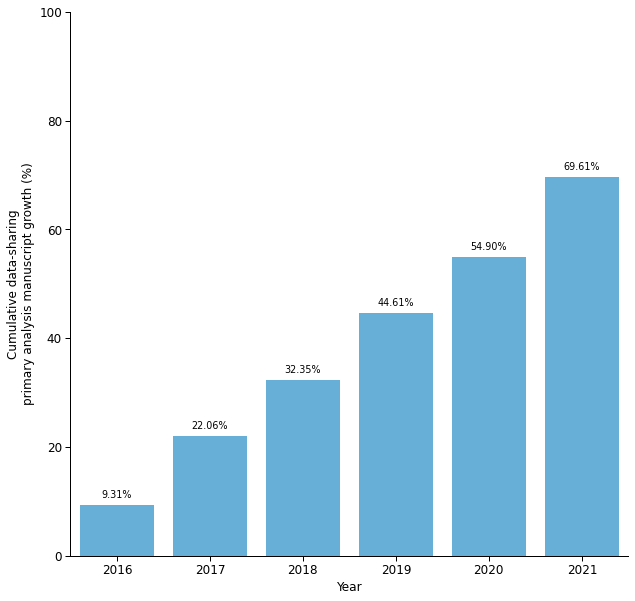

In [13]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#56B4E9']
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',palette=colors )

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year",fontsize=12)
plt.ylabel("Cumulative data-sharing\nprimary analysis manuscript growth (%)",fontsize=12)
plt.ylim([0, 100])
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup5.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 6

In [14]:
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Code availability (Yes/No),PMC_Year,Secondary analysis,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,no,9,1.986755,1.99
1,yes,2017,no,8,1.766004,3.75
2,yes,2018,no,6,1.324503,5.08
3,yes,2019,no,16,3.532009,8.61
4,yes,2020,no,19,4.194260,12.80
5,yes,2021,no,16,3.532009,16.34


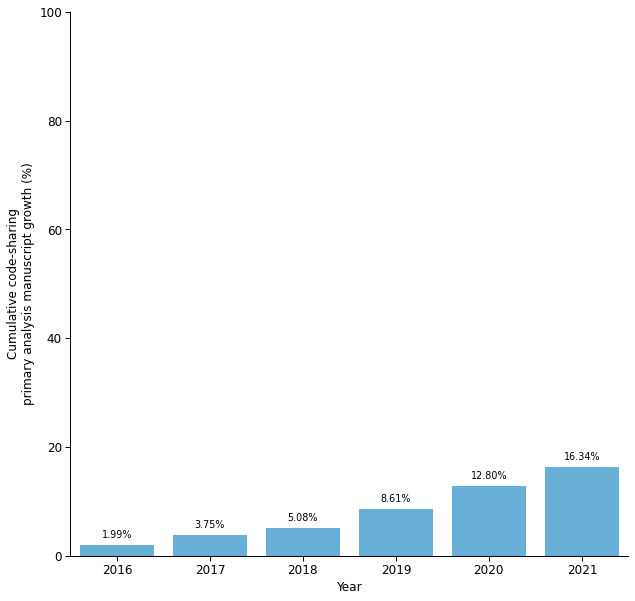

In [15]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#56B4E9']
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase', palette=colors)

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year",fontsize=12)
plt.ylabel("Cumulative code-sharing\nprimary analysis manuscript growth (%)",fontsize=12)
plt.ylim([0, 100])
plt.tick_params(axis='both', labelsize=12)
plt.savefig('../Figures/sup6.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 7

In [16]:
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Code availability (Yes/No),PMC_Year,Secondary analysis,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,yes,24,5.298013,5.30
1,yes,2017,yes,20,4.415011,9.71
2,yes,2018,yes,26,5.739514,15.45
3,yes,2019,yes,24,5.298013,20.75
4,yes,2020,yes,32,7.064018,27.81
5,yes,2021,yes,26,5.739514,33.55


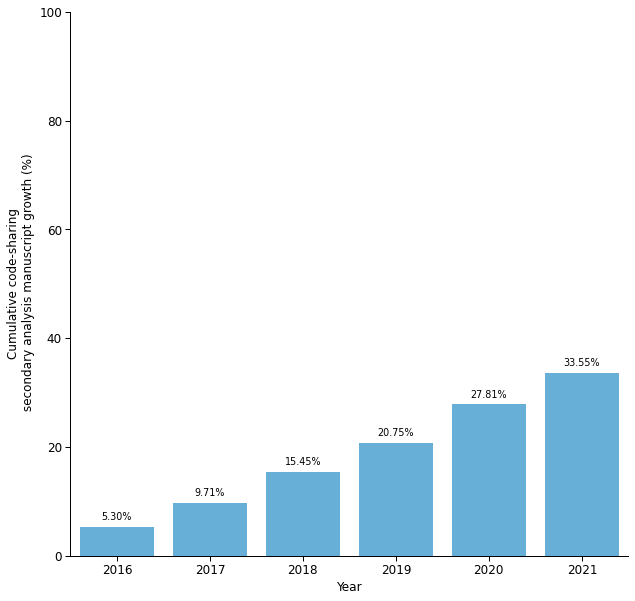

In [17]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#56B4E9']
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase', palette=colors)

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year",fontsize=12)
plt.ylabel("Cumulative code-sharing\n secondary analysis manuscript growth (%)",fontsize=12)
plt.ylim([0, 100])
plt.tick_params(axis='both', labelsize=12)
plt.savefig('../Figures/sup7.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 8

In [18]:
#create dataframe of counts
#df_temp=pd.DataFrame({'Counts': df['If Data availability = yes, where do they share data? (SRA/GEO/other)','Secondary analysis'].value_counts()}).reset_index()
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','If Data availability = yes, where do they share data? (SRA/GEO/other)']).size()}).reset_index()
#ensure data only contains primary analysis studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

#merge hybrid row into the Other category for no 
df_temp.loc[3,'Counts'] += df_temp.loc[0,'Counts']
df_temp = df_temp.drop(0)

#adding SRA,GSE to SRA and GSE Counts
df_temp.loc[4,'Counts'] += df_temp.loc[5,'Counts']
df_temp.loc[2,'Counts'] += df_temp.loc[5,'Counts']
df_temp = df_temp.drop(5)


#adding SRA,GEO to SRA and GEO Counts
df_temp.loc[4,'Counts'] += df_temp.loc[6,'Counts']
df_temp.loc[1,'Counts'] += df_temp.loc[6,'Counts']
df_temp = df_temp.drop(6)

#adding SRA,Other to SRA and Other Counts 
df_temp.loc[4,'Counts'] += df_temp.loc[7,'Counts']
df_temp.loc[3,'Counts'] += df_temp.loc[7,'Counts']
df_temp = df_temp.drop(7)

#rename columns
df_temp=df_temp.rename(columns={"If Data availability = yes, where do they share data? (SRA/GEO/other)":"Data Repository"})

#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort by percentage 
df_temp=df_temp.sort_values('Percentage', ascending=False)
#drop secondary analysis column 
df_temp=df_temp.drop('Secondary analysis', axis=1)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Data Repository,Counts,Percentage
0,Other,69,47.26
1,GEO,42,28.77
2,SRA,26,17.81
3,GSE,9,6.16


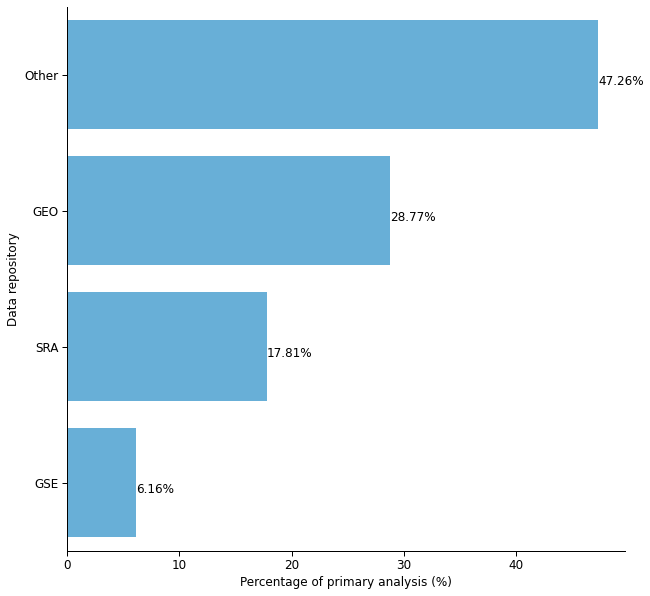

In [19]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ["#56B4E9"]
sns.barplot(data=df_temp, x='Percentage',y='Data Repository',palette=colors)
for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='top', fontsize=12)
plt.xlabel("Percentage of primary analysis (%)", fontsize=12)
plt.ylabel("Data repository", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup8.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 9

In [20]:
df_data_avail=pd.DataFrame({'Counts': df['Data availability (yes/no)'].value_counts()}).reset_index()
#rename columns
df_data_avail=df_data_avail.rename(columns={"index":"Data availability (yes/no)"})

#add percentage column 
df_data_avail['Percentage'] = (df_data_avail['Counts']/df_data_avail['Counts'].sum()) * 100
df_data_avail['Percentage']=df_data_avail['Percentage'].round(2)
df_data_avail

,Data availability (yes/no),Counts,Percentage
0,yes,142,69.61
1,no,41,20.10
2,upon request,21,10.29


In [21]:
df_data_avail_statement=pd.DataFrame({'Counts': df['Data availability statement (yes/no)'].value_counts()}).reset_index()
df_data_avail_statement=df_data_avail_statement.rename(columns={"index":"Data availability statement (yes/no)"})

#add percentage column 
df_data_avail_statement['Percentage'] = (df_data_avail_statement['Counts']/df_data_avail_statement['Counts'].sum()) * 100
df_data_avail_statement['Percentage']=df_data_avail_statement['Percentage'].round(2)
df_data_avail_statement

,Data availability statement (yes/no),Counts,Percentage
0,yes,302,67.71
1,no,144,32.29


In [22]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Data availability statement (yes/no)','Data availability (yes/no)']).size()}).reset_index()
df_temp.loc[df_temp['Data availability statement (yes/no)'] == 'yes', 'Data availability statement (yes/no)'] = 'Data availability\nstatement given\n(' + str(df_data_avail_statement['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Data availability statement (yes/no)'] == 'no', 'Data availability statement (yes/no)'] = 'Data availability\nstatement not given\n(' + str(df_data_avail_statement['Percentage'][1]) +'%)'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'no', 'Data availability (yes/no)'] = 'Data unavailable\n(' + str(df_data_avail['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'yes', 'Data availability (yes/no)'] = 'Data available\n(' + str(df_data_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'Upon request\n(' + str(df_data_avail['Percentage'][2]) + '%)'
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp

,Data availability statement (yes/no),Data availability (yes/no),Counts,Percentage
0,Data availability\nstatement not given\n(32.29%),Data unavailable\n(20.1%),28,13.73
1,Data availability\nstatement not given\n(32.29%),Upon request\n(10.29%),1,0.49
2,Data availability\nstatement not given\n(32.29%),Data available\n(69.61%),9,4.41
3,Data availability\nstatement given\n(67.71%),Data unavailable\n(20.1%),13,6.37
4,Data availability\nstatement given\n(67.71%),Upon request\n(10.29%),20,9.80
5,Data availability\nstatement given\n(67.71%),Data available\n(69.61%),133,65.20


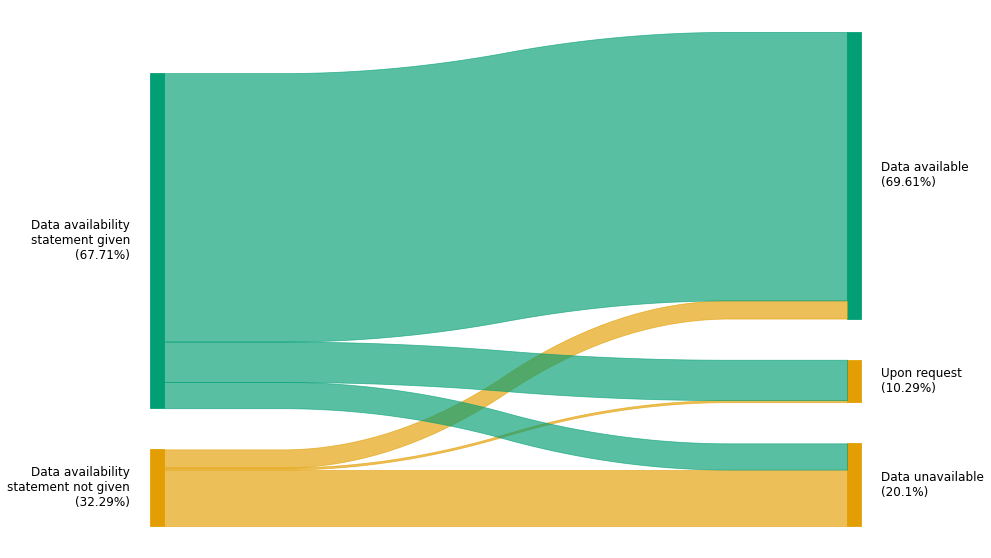

In [23]:
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
category_labels = [
    'Data availability\nstatement not given\n(' + str(df_data_avail_statement['Percentage'][1]) +'%)',
    'Data availability\nstatement given\n(' + str(df_data_avail_statement['Percentage'][0]) + '%)',
    'Data unavailable\n(' + str(df_data_avail['Percentage'][1]) + '%)',
    'Data available\n(' + str(df_data_avail['Percentage'][0]) + '%)',
    'Upon request\n(' + str(df_data_avail['Percentage'][2]) + '%)'
]
colors = ["#e29d00","#009E73","#e29d00","#009E73","#e29d00"]
#colors = ["#fe2626","#21a0fc","#eef91a","#40ee40","#b09ed7"]
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]

sankey(
    left=df_temp['Data availability statement (yes/no)'], right=df_temp['Data availability (yes/no)'],  aspect=20,  rightWeight=df_temp['Counts'].values.astype(float), leftWeight=df_temp['Counts'].values.astype(float),
    fontsize=12,colorDict=color_dict
)
plt.savefig('../Figures/sup9.png', format='png', dpi=300)


## Supplementary Figure 10

In [24]:
df_modified = df.copy()
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'no ', 'If yes, notebook/Rmd'] = 'no'
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'uncertain', 'If yes, notebook/Rmd'] = 'no'
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'yes', 'If yes, notebook/Rmd'] = 'Rmd'
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'notebook', 'If yes, notebook/Rmd'] = 'Notebook'
df_modified=df_modified.fillna('no')
df_temp=pd.DataFrame({'Counts': df_modified['If yes, notebook/Rmd'].value_counts()}).reset_index()
df_temp=df_temp.rename(columns={"index":"Format"})
df_temp.loc[df_temp['Format']=='no', 'Format'] = 'Other'
df_temp.loc[df_temp['Format']=='Rmd', 'Format'] = 'RMD'
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
#df_temp=df_temp[~((df_temp['Format']=='no'))]
df_temp

,Format,Counts,Percentage
0,Other,418,92.27
1,RMD,23,5.08
2,Notebook,12,2.65


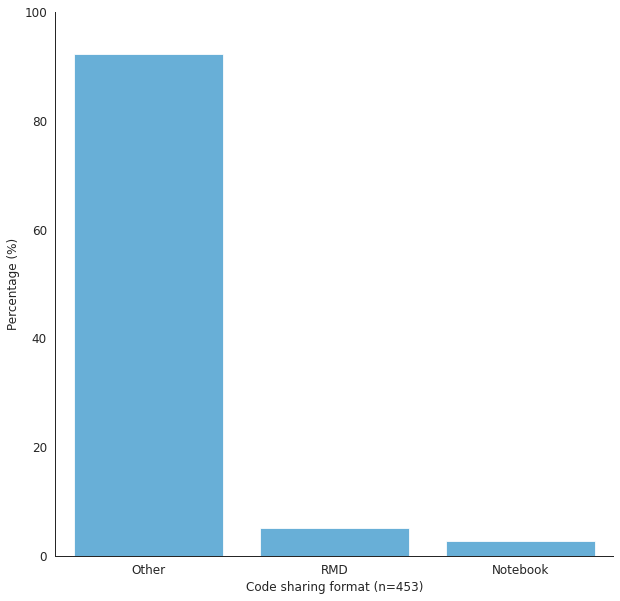

In [25]:
plt.figure(figsize=(10, 10))
sns.set_style("white")
sns.set_context("paper",font_scale=1)
rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 12})
colors = ['#56B4E9']
sns.barplot(data=df_temp, x='Format',y='Percentage', palette=colors)
plt.xlabel("Code sharing format (n=453)",fontsize=12)
plt.ylabel("Percentage (%)",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.ylim(0,100)
sns.despine()
plt.savefig('../Figures/sup10.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 11

In [44]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [45]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

In [46]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','Code Policy']).size()}).reset_index()
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Code availability (Yes/No),Code Policy,Counts,Percentage
2,yes,Encouraged,63,13.91
0,no,Encouraged,108,23.84
1,no,Mandatory,119,26.27
3,yes,Mandatory,163,35.98


In [47]:
df_temp_pivot=df_temp.pivot(index='Code Policy',columns='Code availability (Yes/No)',values='Counts')
df_temp_pivot=df_temp_pivot.rename(columns={"no":"Code unavailable","yes":"Code available"})
df_temp_pivot = df_temp_pivot.reindex(columns=['Code available', 'Code unavailable'])
df_temp_pivot

Code availability (Yes/No),Code available,Code unavailable
Code Policy,,
Encouraged,63,108
Mandatory,163,119


In [48]:

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df_temp_pivot)

# Display the test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 17.876254622464177
P-value: 2.357442656284854e-05


### OR for How likely were articles to share their code if the journal only encouraged sharing code

In [49]:
#stat=odds_ratio([[63,108],[163,119]])
stat=odds_ratio([df_temp_pivot.values[0],df_temp_pivot.values[1]])
res = fisher_exact(df_temp_pivot.values, alternative='two-sided')
print(stat.statistic,res.pvalue)

0.42669200298951576 1.8770835865385955e-05


### OR for How likely were articles to share their code if the journal mandated code sharing

In [50]:
#stat=odds_ratio([[63,108],[163,119]])
stat=odds_ratio([df_temp_pivot.values[1],df_temp_pivot.values[0]])
res = fisher_exact(df_temp_pivot.values, alternative='two-sided')
print(stat.statistic,res.pvalue)

2.3436108316859654 1.8770835865385955e-05


/tmp/ipykernel_11442/1266157966.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_temp, x='Code Policy', y='Percentage',hue='Code availability (Yes/No)', ci=None,palette=color)


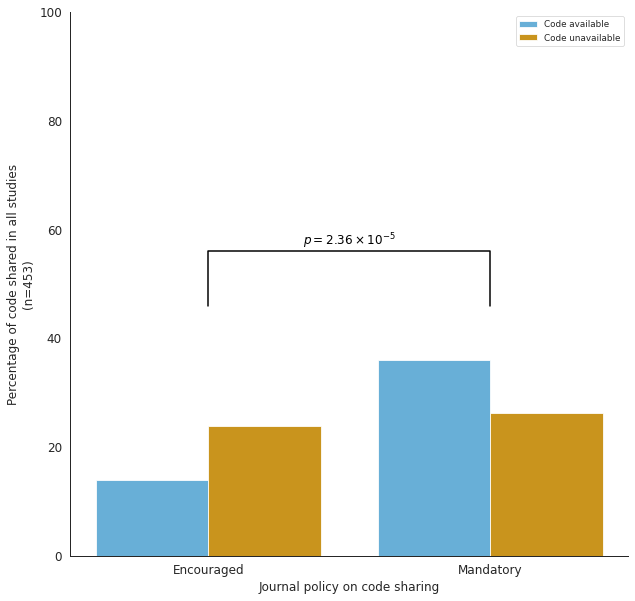

In [34]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#56B4E9','#E69F00']
sns.barplot(data=df_temp, x='Code Policy', y='Percentage',hue='Code availability (Yes/No)', ci=None,palette=color)
plt.legend(labels=['Code available','Code unavailable'])
# statistical annotation
y, h, col = df_temp['Percentage'].max()+10, 10, 'k'
x1, x2 = 0, 1  # columns  (first column: 0, see plt.xticks())
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,2)), ha='center', va='bottom', color=col, fontsize=12)

sns.despine()
plt.ylabel("Percentage of code shared in all studies\n(n=453)",fontsize=12)
plt.ylim(0,100)
plt.xlabel("Journal policy on code sharing",fontsize=12)
plt.tick_params(axis='both', labelsize=12)

plt.savefig('../Figures/sup11.png', format='png', dpi=300)
plt.show()

## Supplementary Table 1

In [40]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
#create dataframe of counts
df_temp=pd.DataFrame({'Counts': df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts()}).reset_index()
#rename columns
df_temp=df_temp.rename(columns={"index":"Source"})
#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp.loc[df_temp['Source']=='Zenodo','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Zenodo'].index[0])

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp.loc[df_temp['Source']=='Supplementary','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Supplementary'].index[0])

#adding Website,Github to Github and Website Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp.loc[df_temp['Source']=='Website','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='Website, Github'].index[0])

#drop NA row
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='NA'].index[0])


#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort data by percentage
df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Source,Counts,Percentage
0,10xGenomics,1,0.43
1,Downloadable File,2,0.85
2,GitLab,2,0.85
3,CRAN,2,0.85
4,Bioconductor,2,0.85
5,Sourceforge,3,1.28
6,Bitbucket,6,2.56
7,Supplementary,6,2.56
8,Zenodo,14,5.98
9,Website,16,6.84


### Figure for Supplementary Table 1 

In [41]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Downloadable File', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'GitLab', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'CRAN', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Bioconductor', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == '10xGenomics', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'

#create dataframe of counts
df_temp=pd.DataFrame({'Counts': df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts()}).reset_index()
#rename columns
df_temp=df_temp.rename(columns={"index":"Source"})
#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp.loc[df_temp['Source']=='Zenodo','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Zenodo'].index[0])

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp.loc[df_temp['Source']=='Supplementary','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Supplementary'].index[0])

#adding Website,Github to Github and Website Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp.loc[df_temp['Source']=='Website','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='Website, Github'].index[0])

#drop NA row
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='NA'].index[0])


#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort data by percentage
df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Source,Counts,Percentage
0,Sourceforge,3,1.28
1,Bitbucket,6,2.56
2,Supplementary,6,2.56
3,Other,9,3.85
4,Zenodo,14,5.98
5,Website,16,6.84
6,GitHub,180,76.92


/tmp/ipykernel_27034/3148919613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_temp, x='Percentage',y='Source', palette=colors)
/tmp/ipykernel_27034/3148919613.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_temp, x='Percentage',y='Source', palette=colors)


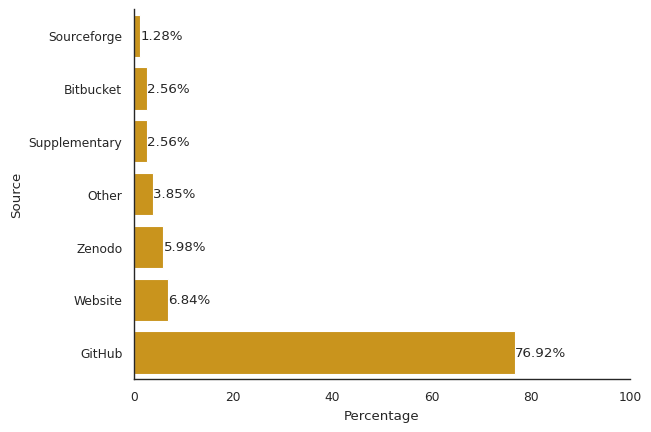

In [42]:
sns.set_style("white")
sns.set_context("paper",font_scale=1)
#sns.set_palette("pastel")
rcParams['font.family'] = 'sans-serif'
colors = ["#E69F00"]
sns.barplot(data=df_temp, x='Percentage',y='Source', palette=colors)
plt.xlim(0,100)
for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='center')
sns.despine()
plt.show()


## Supplementary Table 2

In [43]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory
